In [12]:
#we first import he main libraries
import pandas as pd
pd.set_option('display.max_columns', None, 'display.max_rows', 150)
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib 
matplotlib.style.use('ggplot')
from IPython.display import display
import seaborn as sns
sns.set_style("darkgrid")
from sklearn import linear_model, preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn import ensemble
import xgboost as xgb

from sklearn import neighbors
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier

from joblib import dump, load

In [13]:
#we import the dataframe with rolling features
df = pd.read_csv('DTB_Rolling_Features_ratios_w60.csv')
df.info(null_counts = True, verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74882 entries, 0 to 74881
Data columns (total 103 columns):
 #    Column                       Non-Null Count  Dtype  
---   ------                       --------------  -----  
 0    Unnamed: 0                   74882 non-null  int64  
 1    Tournament                   74882 non-null  object 
 2    Date                         74882 non-null  object 
 3    Court                        74882 non-null  object 
 4    Surface                      74882 non-null  object 
 5    p1_name                      74882 non-null  object 
 6    p2_name                      74882 non-null  object 
 7    ratio_rank                   74882 non-null  float64
 8    Wsets                        74882 non-null  float64
 9    Lsets                        74882 non-null  float64
 10   Comment                      74882 non-null  object 
 11   p1_PS                        74882 non-null  float64
 12   p2_PS                        74882 non-null  float64
 13  

C:\Users\Olia\AppData\Local\Temp/ipykernel_9148/3829940113.py:3: FutureWarning: null_counts is deprecated. Use show_counts instead
  df.info(null_counts = True, verbose = True)


## Preprocessing

In [14]:
#we delete columns added when saving csv
df = df.drop(columns = ["Unnamed: 0"])
#we delete columns not useful for our classification
df = df.drop(columns = ['Tournament', 'Date',
              'p1_name', 'p2_name',
              'Wsets', 'Lsets', "DeltaW", "DeltaL",
              'Comment',
              'tourney_id',
              'p1_id', 'p2_id',
              'score',
              'minutes',
              'tourney_year', 'tourney_month', 'tourney_day',
              'p1_1', 'p2_1', 'p1_2', 'p2_2', 'p1_3', 'p2_3', 'p1_4', 'p2_4', 'p1_5', 'p2_5',
              'p1_sets', 'p2_sets',
               'p1_UpsetScored', 'p2_UpsetScored', 'p1_UpsetAgainst', 'p2_UpsetAgainst',
              #we used these data to compute the other features :
              'p1_ace',
             'p1_df',
             'p1_svpt',
             'p1_1stIn',
             'p1_1stWon',
             'p1_2ndWon',
             'p1_SvGms',
             'p1_bpSaved',
             'p1_bpFaced',
             'p2_ace',
             'p2_df',
             'p2_svpt',
             'p2_1stIn',
             'p2_1stWon',
             'p2_2ndWon',
             'p2_SvGms',
             'p2_bpSaved',
             'p2_bpFaced'  ])
             

In [15]:
df.loc[df['p1_hand']=='U', 'p1_hand'] = 'R'
df.loc[df['p2_hand']=='U', 'p2_hand'] = 'R'

In [16]:
df[df == np.inf].count()

Court                            0
Surface                          0
ratio_rank                       0
p1_PS                            0
p2_PS                            0
p1_B365                          0
p2_B365                          0
ratio_elo                        0
proba_elo                        0
tourney_level                    0
p1_seed                          0
p1_entry                         0
p1_hand                          0
ratio_ht                         0
ratio_age                        0
p2_seed                          0
p2_entry                         0
p2_hand                          0
round                            0
ratio_rank_points                0
p1_win                           0
ratio_1stWon%                    0
ratio_2ndWon%                    0
ratio_1stServeEffectiveness      0
ratio_Ret2ServPtsRatio           0
ratio_ServeWon%                  0
ratio_ReturnWon%                 0
ratio_PtsDominanceRatio          0
ratio_BPConverted%  

In [17]:
df.isna().sum()

Court                             0
Surface                           0
ratio_rank                        0
p1_PS                             0
p2_PS                             0
p1_B365                           0
p2_B365                           0
ratio_elo                         0
proba_elo                         0
tourney_level                     0
p1_seed                           0
p1_entry                          0
p1_hand                           0
ratio_ht                          0
ratio_age                         0
p2_seed                           0
p2_entry                          0
p2_hand                           0
round                             0
ratio_rank_points                 0
p1_win                            0
ratio_1stWon%                  2152
ratio_2ndWon%                  2152
ratio_1stServeEffectiveness    2152
ratio_Ret2ServPtsRatio         2152
ratio_ServeWon%                2152
ratio_ReturnWon%               2152
ratio_PtsDominanceRatio     

In [18]:
#we delete the remaining NAs and infs
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df = df.dropna(axis = 0)

In [19]:
df.info(null_counts = True, verbose = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71947 entries, 40 to 74881
Data columns (total 51 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Court                        71947 non-null  object 
 1   Surface                      71947 non-null  object 
 2   ratio_rank                   71947 non-null  float64
 3   p1_PS                        71947 non-null  float64
 4   p2_PS                        71947 non-null  float64
 5   p1_B365                      71947 non-null  float64
 6   p2_B365                      71947 non-null  float64
 7   ratio_elo                    71947 non-null  float64
 8   proba_elo                    71947 non-null  float64
 9   tourney_level                71947 non-null  object 
 10  p1_seed                      71947 non-null  float64
 11  p1_entry                     71947 non-null  object 
 12  p1_hand                      71947 non-null  object 
 13  ratio_ht       

C:\Users\Olia\AppData\Local\Temp/ipykernel_9148/3018253136.py:1: FutureWarning: null_counts is deprecated. Use show_counts instead
  df.info(null_counts = True, verbose = True)


In [20]:
#Treating categorial features
df_num = df.select_dtypes(['float', 'int64'])
#we delete p1_seed and p2_seed that are categorial features. We'll add them to not_num after getting dummies as they have already 0/1 values
df_num.drop(['p1_seed', 'p2_seed'], axis=1, inplace=True)
#getting dummies from categorial features
df_not_num = df.select_dtypes(['O'])
df_not_num = pd.get_dummies(df_not_num, drop_first = True)
df_not_num[['p1_seed', 'p2_seed']] = df[['p1_seed', 'p2_seed']]

#Set data and target
data = pd.concat([df_num, df_not_num], axis = 1)
target = df['p1_win']
target = pd.Series([1 if x else 0 for x in target], name='p1_win')

D:\Olia\Documents\Papa\Conda\envs\jupyter\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [21]:
data

,ratio_rank,p1_PS,p2_PS,p1_B365,p2_B365,ratio_elo,proba_elo,ratio_ht,ratio_age,ratio_rank_points,ratio_1stWon%,ratio_2ndWon%,ratio_1stServeEffectiveness,ratio_Ret2ServPtsRatio,ratio_ServeWon%,ratio_ReturnWon%,ratio_PtsDominanceRatio,ratio_BPConverted%,ratio_BPRatio,ratio_SetWon%,ratio_PtsWon%,ratio_Pts2Sets_OP_Ratio,ratio_GmsWon%,ratio_Pts2Gms_OP_Ratio,ratio_Gms2Sets_OP_Ratio,ratio_BPWon%,ratio_BP_OP_Ratio,ratio_BPSaved%,ratio_BPSaved_OP_Ratio,ratio_BPConverted_OP_Ratio,ratio_Ace%,ratio_DF%,ratio_1stServe%,ratio_1stReturnWon%,p1_rank_change,p2_rank_change,p1_rank_points_change,p2_rank_points_change,p1_elo_change,p2_elo_change,Court_Outdoor,Surface_Clay,Surface_Grass,Surface_Hard,tourney_level_F,tourney_level_G,tourney_level_M,p1_entry_LL,p1_entry_Norm,p1_entry_PR,p1_entry_Q,p1_entry_SE,p1_entry_WC,p1_hand_R,p2_entry_LL,p2_entry_Norm,p2_entry_PR,p2_entry_Q,p2_entry_SE,p2_entry_WC,p2_hand_R,round_QF,round_R128,round_R16,round_R32,round_R64,round_RR,round_SF,p1_seed,p2_seed
40,0.187500,2.091841,1.915885,2.091841,1.915885,0.990032,0.478048,1.028090,0.831056,2.319431,1.180851,0.888889,1.328457,0.838710,1.071123,0.895009,1.357911,0.916667,0.916667,1.000000,0.876923,1.140351,0.762821,0.869883,1.310924,0.857143,0.977444,1.000000,0.933599,1.024199,2.506024,3.759036,0.981526,0.641509,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,1.0,1.0
41,5.333333,1.915885,2.091841,1.915885,2.091841,1.010068,0.521952,0.972678,1.203289,0.431140,0.846847,1.125000,0.752753,1.192308,0.933599,1.117308,0.736425,1.090909,1.090909,1.000000,1.140351,0.876923,1.310924,1.149580,0.762821,1.166667,1.023077,1.000000,1.071123,0.976373,0.399038,0.266026,1.018822,1.558824,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,1.0,1.0
44,2.656250,2.192348,1.838681,2.192348,1.838681,0.980239,0.456132,1.028090,0.914667,0.531754,0.891892,1.359707,0.646455,0.969786,1.053242,0.916193,0.931807,0.813953,0.806452,1.000000,1.018424,0.981503,1.002474,0.985709,0.989691,0.875000,0.856638,1.145455,1.096881,0.886205,0.000000,0.992451,1.125907,1.085631,0.000000,0.000000,0.000000,0.000000,0.000000,0.020842,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0.0,1.0
46,0.136364,2.092053,1.915706,2.092053,1.915706,0.989909,0.477999,0.948187,0.964747,2.575789,0.932928,1.079955,0.865218,0.785273,0.882130,1.230383,1.609930,1.021429,0.812500,0.500000,0.848006,0.561644,0.801775,0.941389,0.548701,0.933036,1.098012,0.761905,0.881714,0.875333,0.513831,1.051635,0.766478,0.661609,0.000000,0.000000,0.000000,0.000000,0.010667,0.000000,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1.0,1.0
47,7.333333,1.915706,2.092053,1.915706,2.092053,1.010194,0.522001,1.054645,1.036541,0.388230,1.071894,0.925965,1.155778,1.273442,1.133620,0.812755,0.621145,0.979021,1.230769,2.000000,1.179237,1.780488,1.247232,1.062261,1.822485,1.071770,0.910737,1.312500,1.134155,1.142422,1.946166,0.950900,1.304668,1.511467,0.000000,0.000000,0.000000,0.000000,0.000000,0.010667,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74877,1.533333,1.650000,2.430000,1.660000,2.200000,0.996440,0.490563,0.989189,1.244156,0.790150,0.929071,1.046381,0.901450,1.074599,0.985865,1.026224,0.940391,0.968975,0.733887,1.018006,1.023280,0.978738,1.028624,1.001510,0.969397,0.908827,0.888953,0.820220,0.837166,0.967162,0.320866,0.629966,1.117939,1.232831,0.437500,0.000000,-0.157534,0.083024,0.010896,0.005808,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1.0,1.0
74878,7.375000,3.630000,1.340000,3.500000,1.300000,0.893897,0.244897,0.926108,0.672870,0.310796,0.942981,0.928060,1.008276,0.977711,0.902069,1.224987,1.238712,1.004

In [12]:
#We split the data in train/test samples with 20% test size
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2)

#Normalization
scaler = preprocessing.MinMaxScaler(feature_range=(-1, 1))
#scaler = preprocessing.StandardScaler()
#we normalize only the numeric values, fitted on train samples
X_train_num = pd.DataFrame(scaler.fit_transform(X_train[df_num.columns]), index=X_train.index, columns=df_num.columns)
X_train_not_num = X_train[df_not_num.columns]
X_train = pd.concat([X_train_num, X_train_not_num], axis=1)
#and we apply the scaler on test data
X_test_num = pd.DataFrame(scaler.transform(X_test[df_num.columns]), index=X_test.index, columns=df_num.columns)
X_test_not_num = X_test[df_not_num.columns]
X_test = pd.concat([X_test_num, X_test_not_num], axis=1)

# Logistic regression

In [13]:
#GridSearchCV on various parameters
clf_lr1 = LogisticRegression(max_iter=1000, n_jobs=-1)
params_lr1 = {'solver' : ['liblinear', 'lbfgs'], 'C' : np.logspace(-2,3,20)}
params_lr1 = [{'solver' : ['liblinear', 'lbfgs'], 'penalty' : ['l2'], 'C' : [0.1, 1, 5, 10, 50, 80, 100, 200, 500]}, {'solver' : ['saga'], 'penalty' : ['elasticnet'], 'C' : [0.1, 1, 5, 10, 50, 80, 100, 200, 500], 'l1_ratio' : [0, 0.25,0.5,0.75,1]}]
gridcv1 = GridSearchCV(clf_lr1, param_grid=params_lr1, cv=3, n_jobs=-1)

In [14]:
gridcv1.fit(X_train, y_train)
print('Logistic regression gridsearchcv best params : ', gridcv1.best_params_)
print('Logistic regression accuracy score : ', gridcv1.score(X_test, y_test))
pd.DataFrame(gridcv1.cv_results_)[['param_C', 'param_solver','param_penalty', 'param_l1_ratio', 'mean_test_score', 'std_test_score']]

Logistic regression gridsearchcv best params :  {'C': 5, 'l1_ratio': 1, 'penalty': 'elasticnet', 'solver': 'saga'}
Logistic regression accuracy score :  0.6824043559249177


,param_C,param_solver,param_penalty,param_l1_ratio,mean_test_score,std_test_score
0,0.1,liblinear,l2,NaN,0.671861,0.002028
1,0.1,lbfgs,l2,NaN,0.671986,0.002238
2,1,liblinear,l2,NaN,0.678291,0.002045
3,1,lbfgs,l2,NaN,0.678166,0.002211
4,5,liblinear,l2,NaN,0.678488,0.001882
5,5,lbfgs,l2,NaN,0.678435,0.001978
6,10,liblinear,l2,NaN,0.678721,0.001796
7,10,lbfgs,l2,NaN,0.678649,0.001775
8,50,liblinear,l2,NaN,0.678632,0.001968
9,50,lbfgs,l2,NaN,0.678560,0.001816


In [19]:
#Confusion matrix with gridsearch results
y_pred_lr1 = gridcv1.predict(X_test)

print(classification_report(y_test, y_pred_lr1))
pd.crosstab(pd.Series([1 if y else 0 for y in y_test]), y_pred_lr1, rownames=['Valeurs réelles'], colnames=['Valeurs prédites'])

              precision    recall  f1-score   support

           0       0.69      0.68      0.68      7037
           1       0.68      0.68      0.68      6921

    accuracy                           0.68     13958
   macro avg       0.68      0.68      0.68     13958
weighted avg       0.68      0.68      0.68     13958



Valeurs prédites,0,1
Valeurs réelles,,
0,4803,2234
1,2199,4722


In [15]:
#In practice, as the code above is very long and differences between the parameters are not significative, we can use those
lr = LogisticRegression(max_iter=1000, n_jobs=-1, C=80).fit(X_train, y_train)
print("LR Score : ", lr.score(X_test, y_test))
y_pred_lr = lr.predict(X_test)
print(classification_report(y_test, y_pred_lr))

LR Score :  0.6823327124229832
              precision    recall  f1-score   support

           0       0.69      0.68      0.68      7037
           1       0.68      0.68      0.68      6921

    accuracy                           0.68     13958
   macro avg       0.68      0.68      0.68     13958
weighted avg       0.68      0.68      0.68     13958



In [21]:
#Confusion matrix
pd.crosstab(pd.Series([1 if y else 0 for y in y_test]), y_pred_lr, rownames=['Classes réelles'], colnames=['Classes prédites'])

Classes prédites,0,1
Classes réelles,,
0,4801,2236
1,2198,4723


C:\Users\Julien\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


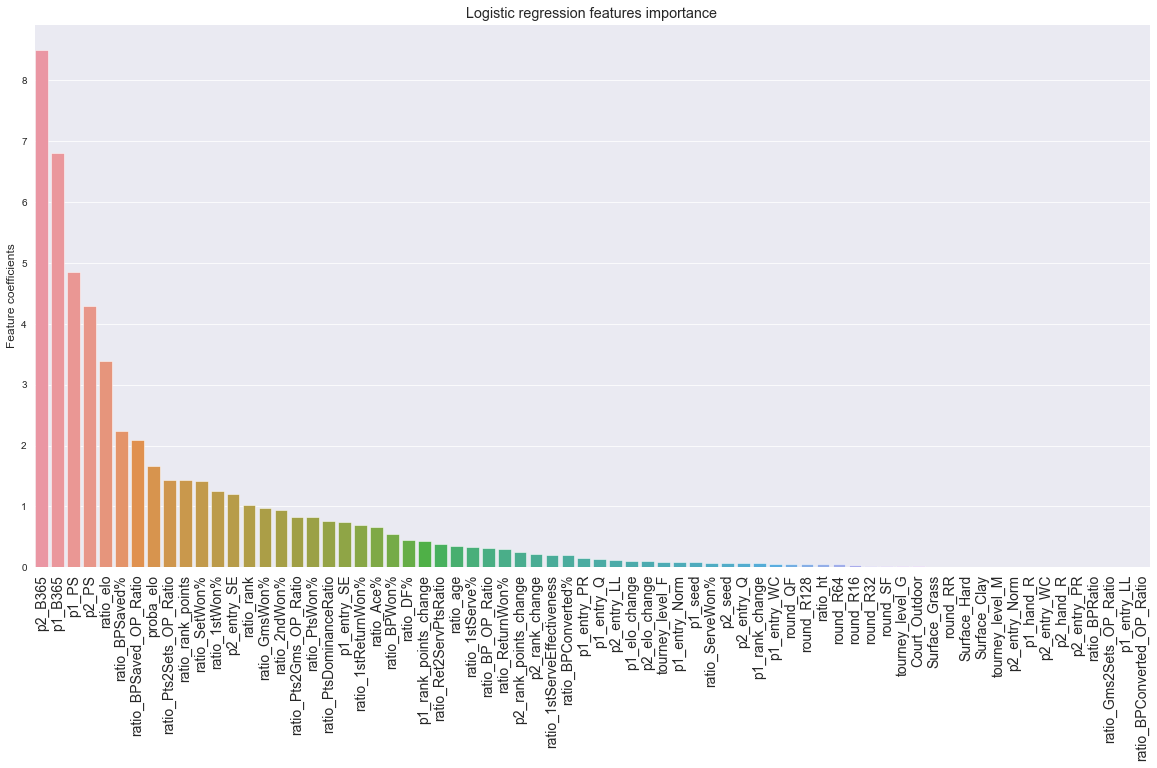

In [22]:
#Features importance
lr_best_estimator = gridcv1.best_estimator_
importance = pd.DataFrame(np.abs(lr_best_estimator.coef_[0]), index = data.columns)
importance = importance.sort_values(by=0, ascending=False)
plt.figure(figsize=(20,10))
sns.barplot(importance.index, np.abs(importance[0]))
plt.xticks(rotation = 90)
plt.xticks(fontsize = 14)
plt.ylabel("Feature coefficients")
plt.title('Logistic regression features importance');

Features have been reduced from 70 to : (18,)
with Index(['ratio_rank', 'p1_PS', 'p2_PS', 'p1_B365', 'p2_B365', 'ratio_elo',
       'proba_elo', 'ratio_rank_points', 'ratio_1stWon%', 'ratio_2ndWon%',
       'ratio_SetWon%', 'ratio_PtsWon%', 'ratio_Pts2Sets_OP_Ratio',
       'ratio_GmsWon%', 'ratio_Pts2Gms_OP_Ratio', 'ratio_BPSaved%',
       'ratio_BPSaved_OP_Ratio', 'p2_entry_SE'],
      dtype='object')


C:\Users\Julien\miniconda3\lib\site-packages\sklearn\base.py:438: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
C:\Users\Julien\miniconda3\lib\site-packages\sklearn\base.py:438: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Logistic regression with selected features best params :  {'C': 200, 'penalty': 'l2', 'solver': 'lbfgs'}
Logistic regression with selected features accuracy score :  0.679037111334002


C:\Users\Julien\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


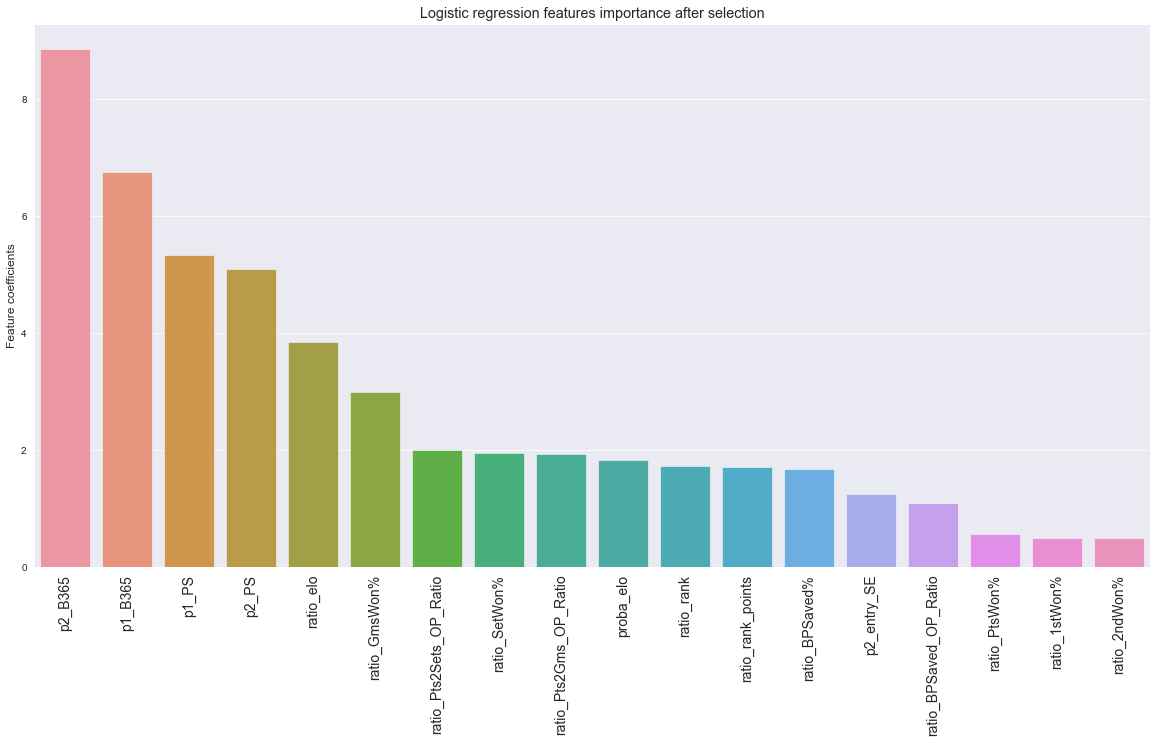

In [23]:
#features reduction
sel = SelectFromModel(estimator=gridcv1.best_estimator_, threshold='mean', prefit=True)
print('Features have been reduced from 70 to :', data.columns[sel.get_support()].shape)
print('with', data.columns[sel.get_support()])

#Training and testing logistic regression with those reduced features
X_train_reduced = sel.transform(X_train)
X_test_reduced = sel.transform(X_test)

gridcv1.fit(X_train_reduced, y_train)
print('Logistic regression with selected features best params : ', gridcv1.best_params_)
print('Logistic regression with selected features accuracy score : ', gridcv1.score(X_test_reduced, y_test))

importance = pd.DataFrame(np.abs(gridcv1.best_estimator_.coef_[0]), index = data.columns[sel.get_support()])
importance = importance.sort_values(by=0, ascending=False)
plt.figure(figsize=(20,10))
sns.barplot(importance.index, np.abs(importance[0]))
plt.xticks(rotation = 90)
plt.xticks(fontsize = 14)
plt.ylabel('Feature coefficients')
plt.title('Logistic regression features importance after selection');

# KNN

KNN accuracy score for 3 neighbors : 0.6006591202177962
KNN accuracy score for 5 neighbors : 0.6070353918899556
KNN accuracy score for 8 neighbors : 0.6190715002149305
KNN accuracy score for 10 neighbors : 0.6215790227826337
KNN accuracy score for 12 neighbors : 0.6267373549219086
KNN accuracy score for 15 neighbors : 0.631609113053446
KNN accuracy score for 20 neighbors : 0.6381286717294742
KNN accuracy score for 25 neighbors : 0.6430004298610116
KNN accuracy score for 30 neighbors : 0.641352629316521
KNN accuracy score for 40 neighbors : 0.6422123513397335
KNN accuracy score for 50 neighbors : 0.6437885083822897
KNN accuracy score for 60 neighbors : 0.6470841094712709
KNN accuracy score for 80 neighbors : 0.6470124659693366
KNN accuracy score for 100 neighbors : 0.6488751970196304
KNN accuracy score for 150 neighbors : 0.6518125805989397


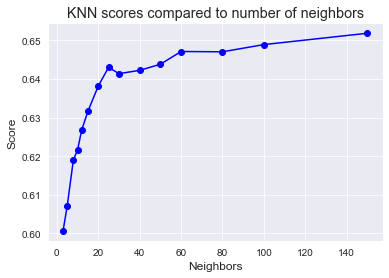

In [49]:
n_neighbors = [3, 5, 8, 10, 12, 15, 20, 25, 30, 40, 50, 60, 80, 100, 150]
scores = []
for n in n_neighbors:
    knn = KNeighborsClassifier(n_neighbors = n, metric = "euclidean") 
    knn.fit(X_train,y_train);
    score = knn.score(X_test, y_test)
    scores.append(score)
    print('KNN accuracy score for', n, 'neighbors :', score)

plt.plot(n_neighbors, scores, 'b-', marker='o')
plt.xlabel("Neighbors")
plt.ylabel("Score")
plt.title("KNN scores compared to number of neighbors");

# Decision Tree

In [25]:
tree = DecisionTreeClassifier(max_depth=4)
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4)

In [26]:
print("Validation Mean accuracy Score: ", cross_val_score(tree, X_train, y_train, cv=5, scoring='accuracy').mean())
print("Validation Mean F1 Score: ", cross_val_score(tree, X_train, y_train, cv=5, scoring='f1_macro').mean())

Validation Mean accuracy Score:  0.6789897904352499
Validation Mean F1 Score:  0.6789501627560911


In [27]:
print("Decision Tree accuracy score : ", tree.score(X_test, y_test))

Decision Tree accuracy score :  0.6793236853417395


In [28]:
y_pred = tree.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.68      0.68      7037
           1       0.68      0.68      0.68      6921

    accuracy                           0.68     13958
   macro avg       0.68      0.68      0.68     13958
weighted avg       0.68      0.68      0.68     13958



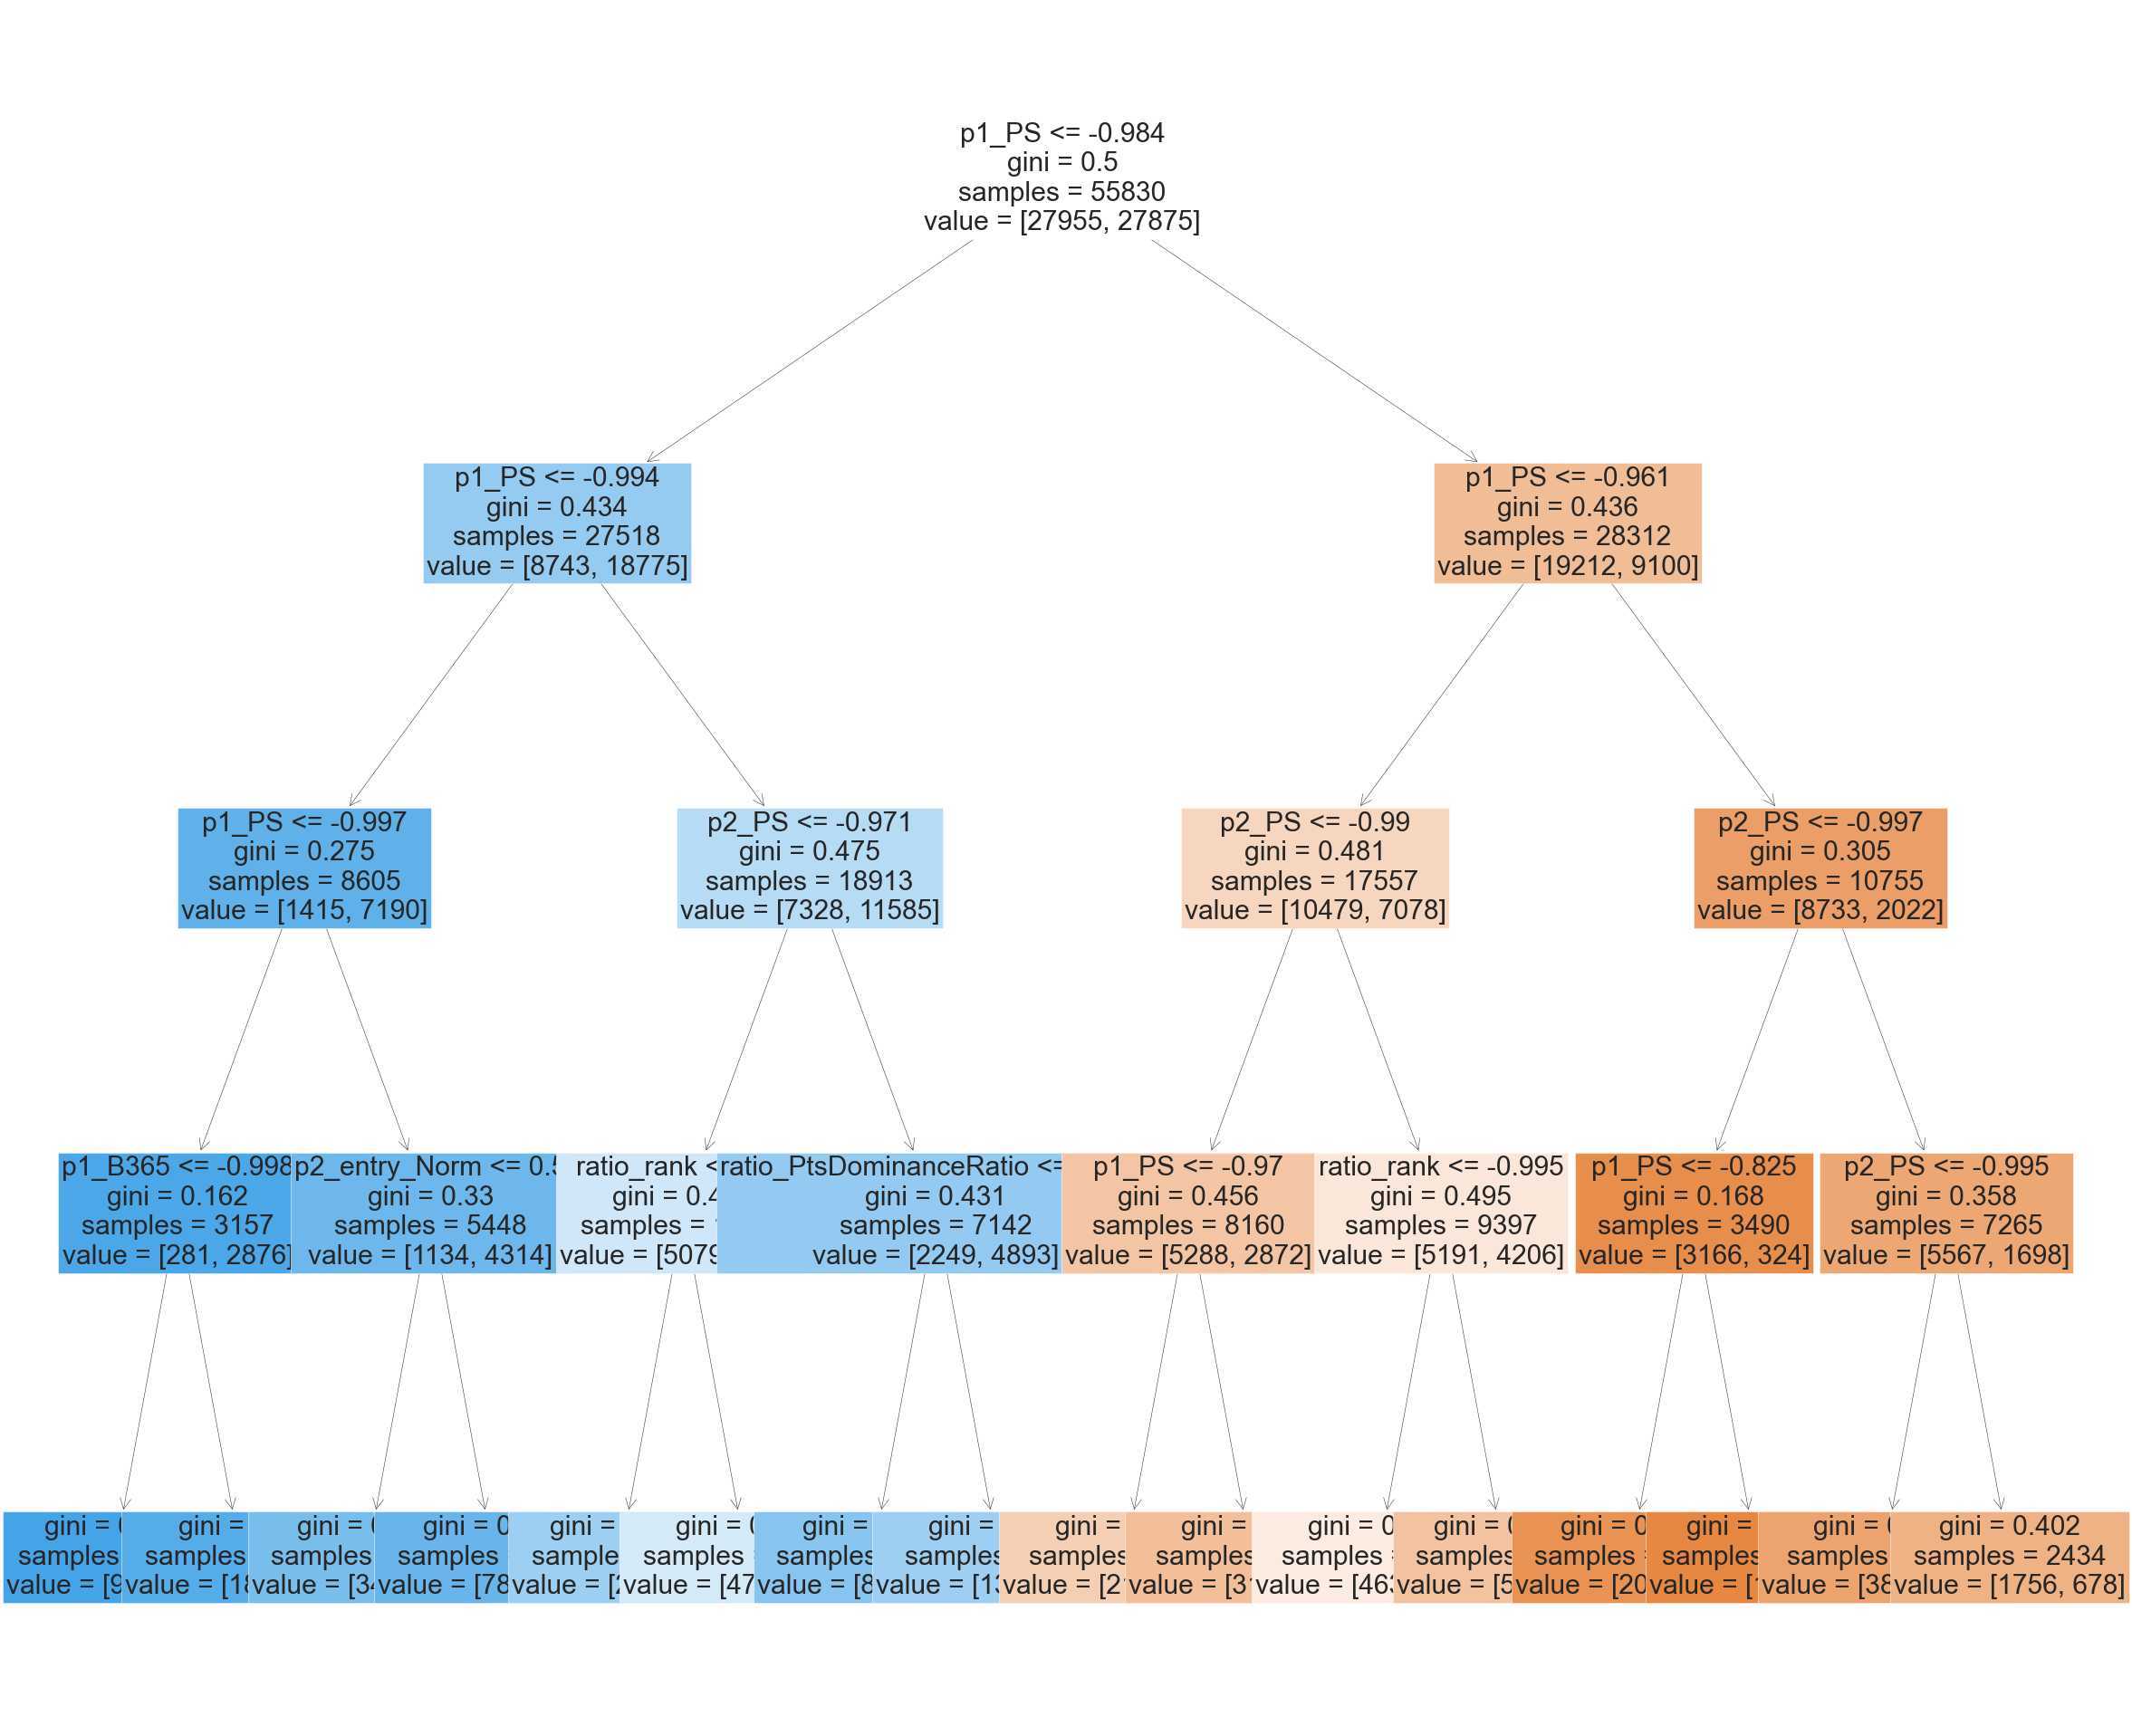

In [29]:
from sklearn.tree import plot_tree

plt.figure(figsize=(40,35))
plot_tree(tree, feature_names = X_train.columns.tolist(), filled=True, fontsize=30);

In [30]:
feature_importances = {}
for feature, importance in zip(data.columns, tree.feature_importances_):
    feature_importances[feature] = importance
importances = pd.DataFrame.from_dict(feature_importances, orient='index').rename({0:'Importance'}, axis=1)
importances = importances.sort_values(by='Importance',ascending=False)
importances.head(30)

,Importance
p1_PS,0.929962
p2_PS,0.058459
ratio_rank,0.007133
ratio_PtsDominanceRatio,0.002102
p1_B365,0.001399
p2_entry_Norm,0.000944
round_RR,0.000000
p1_entry_SE,0.000000
p1_seed,0.000000
p2_elo_change,0.000000


C:\Users\Julien\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


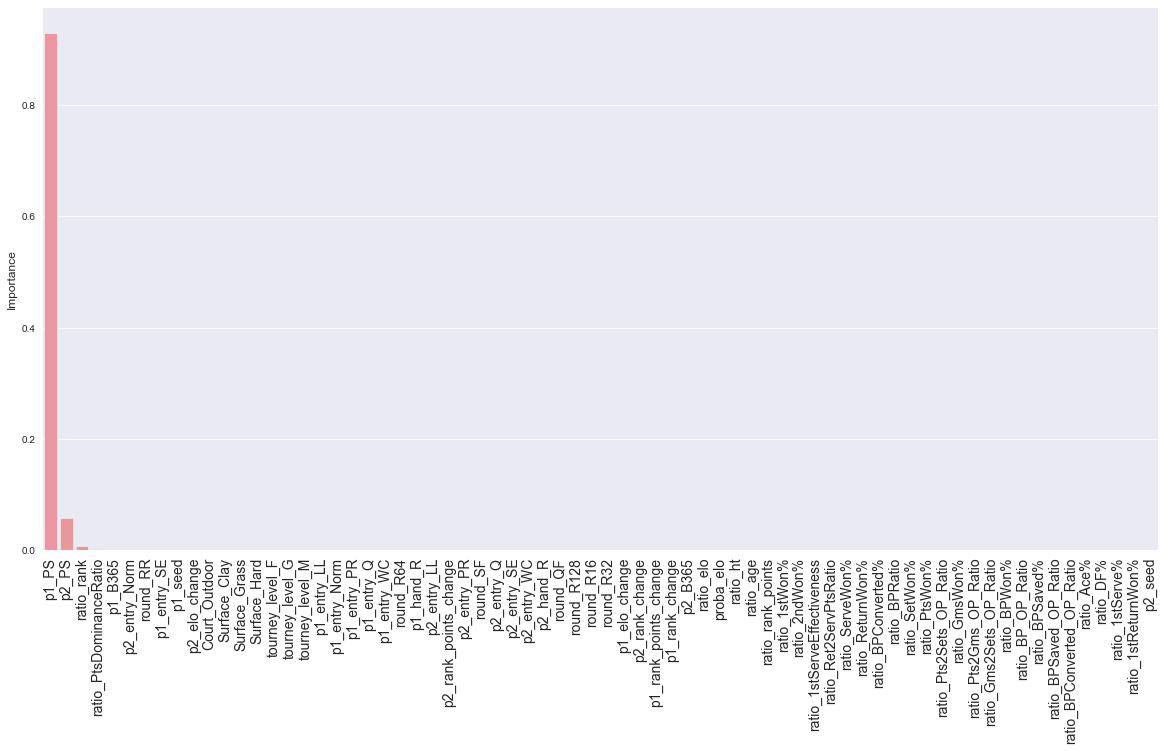

In [31]:
plt.figure(figsize=(20,10))
sns.barplot(importances.index, importances['Importance'])
plt.xticks(rotation = 90)
plt.xticks(fontsize = 14);

# Random Forest

In [50]:
rfc = ensemble.RandomForestClassifier(n_jobs=-1, max_depth=7, min_samples_leaf=0.001)
rfc.fit(X_train, y_train)
y_pred_rf = rfc.predict(X_test)
print("Validation F1 score: ", cross_val_score(rfc, X_train, y_train, cv=5, scoring='f1_macro').mean())
print('Random Forest accuracy score : ', rfc.score(X_test, y_test))
print('Random Forest classification report : \n', classification_report(y_test, y_pred_rf))

Validation F1 score:  0.6798459573280328
Random Forest accuracy score :  0.679037111334002
Random Forest classification report : 
               precision    recall  f1-score   support

           0       0.68      0.68      0.68      7037
           1       0.67      0.68      0.68      6921

    accuracy                           0.68     13958
   macro avg       0.68      0.68      0.68     13958
weighted avg       0.68      0.68      0.68     13958



In [33]:
params_rf = {"max_depth" : [i for i in range(1,13)], "min_samples_leaf" : [0.0005, 0.001, 0.005, 0.01, 0.05]}
gridcv_rf = GridSearchCV(rfc, params_rf, n_jobs=-1)
gridcv_rf.fit(X_train, y_train)
print("Train score :", gridcv_rf.score(X_train, y_train))
print("Test score :", gridcv_rf.score(X_test, y_test))
print("Test score :", gridcv_rf.best_params_)

Train score : 0.6973132724341752
Test score : 0.6788938243301332
Test score : {'max_depth': 10, 'min_samples_leaf': 0.001}


In [34]:
#Confusion matrix
pd.crosstab(y_test, y_pred_rf, rownames=['Classes réelles'], colnames=['Classes prédites'])

Classes prédites,0,1
Classes réelles,,
0,4769,2268
1,2207,4714


In [35]:
feature_importances = {}
for feature, importance in zip(data.columns, rfc.feature_importances_):
    feature_importances[feature] = importance
importances = pd.DataFrame.from_dict(feature_importances, orient='index').rename({0:'Importance'}, axis=1)
importances = importances.sort_values(by='Importance',ascending=False)
importances.head(30)

,Importance
p2_PS,0.141240
p1_PS,0.131134
p1_B365,0.123192
p2_B365,0.109317
ratio_elo,0.091250
proba_elo,0.079985
ratio_rank,0.040078
ratio_PtsWon%,0.039947
ratio_GmsWon%,0.036068
ratio_PtsDominanceRatio,0.034426


C:\Users\Julien\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


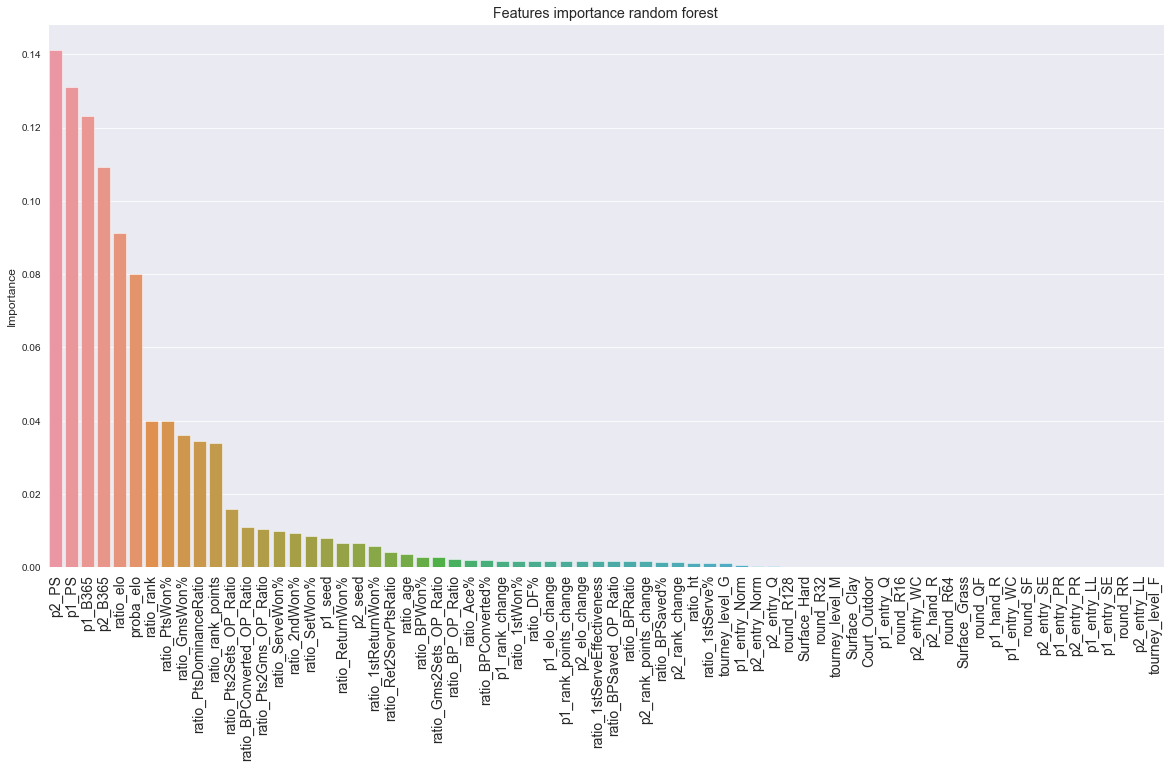

In [36]:
plt.figure(figsize=(20,10))
sns.barplot(importances.index, importances['Importance'])
plt.xticks(rotation = 90)
plt.xticks(fontsize = 14)
plt.title("Features importance random forest");

## XGBoost

In [37]:
train = xgb.DMatrix(X_train, y_train)
test = xgb.DMatrix(X_test, y_test)

params_xgb = {'booster' : 'gbtree', 'learning_rate' : 0.1, 'objective' : 'binary:logistic', 'nthread' : -1}
xgb1 = xgb.train(params=params_xgb, dtrain=train, num_boost_round=1000, early_stopping_rounds= 10, evals=[(train, 'train'), (test, 'eval')])

[13:04:09] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0]	train-logloss:0.67445	eval-logloss:0.67504
[1]	train-logloss:0.65912	eval-logloss:0.66027
[2]	train-logloss:0.64645	eval-logloss:0.64807
[3]	train-logloss:0.63584	eval-logloss:0.63803
[4]	train-logloss:0.62696	eval-logloss:0.62988
[5]	train-logloss:0.61939	eval-logloss:0.62302
[6]	train-logloss:0.61297	eval-logloss:0.61726
[7]	train-logloss:0.60747	eval-logloss:0.61240
[8]	train-logloss:0.60276	eval-logloss:0.60830
[9]	train-logloss:0.59874	eval-logloss:0.60505
[10]	train-logloss:0.59520	eval-logloss:0.60213
[11]	train-logloss:0.59217	eval-logloss:0.59969
[12]	train-logloss:0.58949	eval-logloss:0.59764
[13]	train-logloss:0.58705	eval-logloss:0.59584
[14]	train-logloss:0.58498	eval-logloss:0.59448
[

In [38]:
xgb1_pred_proba = xgb1.predict(test)
xgb1_pred = pd.Series([1 if p>0.5 else 0 for p in xgb1_pred_proba])
cm = pd.crosstab(pd.Series([1 if y else 0 for y in y_test]), xgb1_pred, rownames=['Real class'], colnames=['Predicted class XGB'])
cm

Predicted class XGB,0,1
Real class,,
0,4797,2240
1,2172,4749


In [39]:
print('Accuracy XGB : ', (cm.iloc[0,0] + cm.iloc[1,1])/cm.values.sum())
print('Precision XGB : ', cm.iloc[1,1] / cm.iloc[:,1].sum())
print('Recall XGB : ', cm.iloc[1,1] / cm.iloc[:,1].sum())
print('XGBoost classification report : \n', classification_report(y_test, xgb1_pred))

Accuracy XGB :  0.6839088694655395
Precision XGB :  0.6794963514093576
Recall XGB :  0.6794963514093576
XGBoost classification report : 
               precision    recall  f1-score   support

           0       0.69      0.68      0.68      7037
           1       0.68      0.69      0.68      6921

    accuracy                           0.68     13958
   macro avg       0.68      0.68      0.68     13958
weighted avg       0.68      0.68      0.68     13958



C:\Users\Julien\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


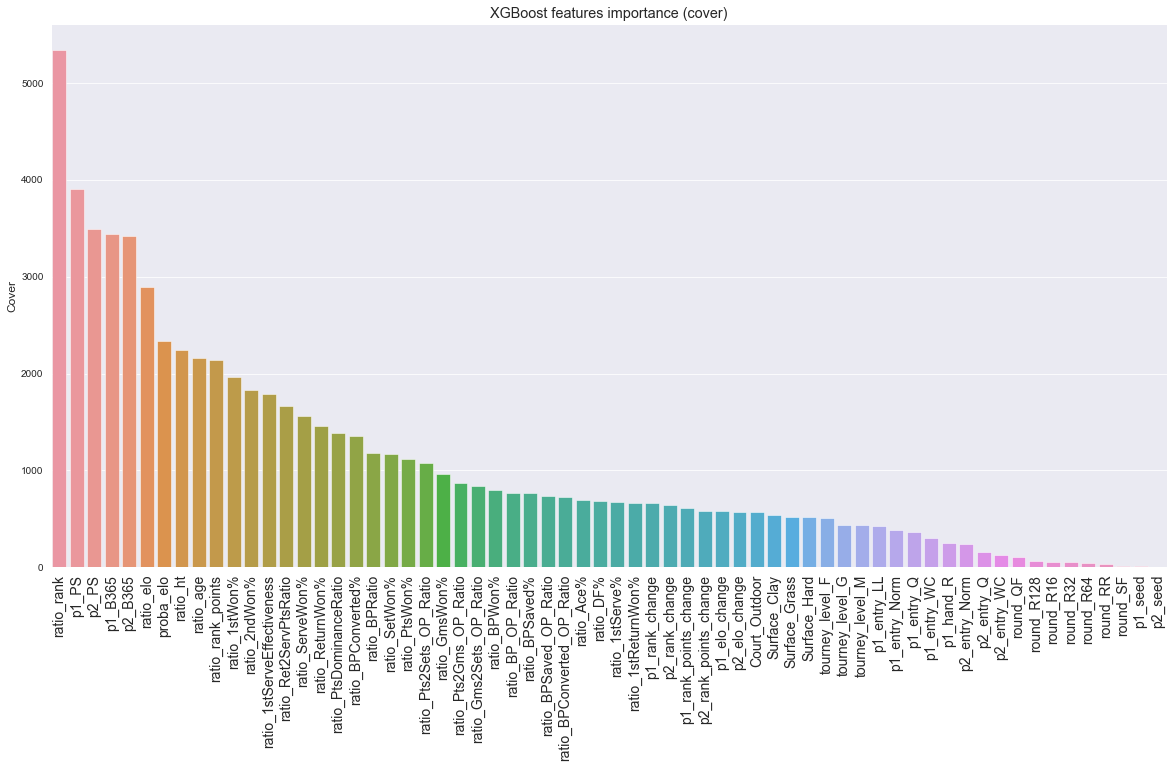

In [40]:
importance_cover = xgb1.get_score(importance_type='cover')
plt.figure(figsize=(20,10))
sns.barplot(list(importance_cover.keys()), sorted(importance_cover.values(), reverse=True))
plt.xticks(rotation = 90)
plt.xticks(fontsize = 14)
plt.ylabel('Cover')
plt.title('XGBoost features importance (cover)');

## Performances summary

In [51]:
#With window for moving averages corresponding to the opened csv at the beginning of this notebook
results_summary = pd.DataFrame({'Precision' : np.array([lr.score(X_test, y_test), knn.score(X_test, y_test), tree.score(X_test, y_test), rfc.score(X_test, y_test), classification_report(y_test, xgb1_pred, output_dict=True)['macro avg']['precision']])}, 
             index=['Logistic regression', 'KNN (150 neighbors)', 'Decision Tree (depth=4)', 'Random forest', 'XGBoost'])


results_summary.style.format({'Precision': '{:,.2%}'.format})

,Precision
Logistic regression,68.23%
KNN (50 neighbors),65.18%
Decision Tree (depth=4),67.93%
Random forest,67.90%
XGBoost,68.39%


# Without correlated and non-player related features

In [52]:
#We delete features that are not related to player
#round
data_reduced = data.drop(data.columns[data.columns.str.startswith('round_')], axis=1)
#tourney_level, surface, indoor/outdoor
data_reduced = data_reduced.drop(data.columns[data.columns.str.startswith('tourney_level_')], axis=1)
data_reduced = data_reduced.drop(data.columns[data.columns.str.startswith('Surface_')], axis=1)
data_reduced = data_reduced.drop('Court_Outdoor', axis=1)

#We delete features that are highly correlated to another one
#seed : correlated to ratio_rank
data_reduced = data_reduced.drop(['p1_seed', 'p2_seed'], axis=1)
#rank points : correlated to ratio_rank
data_reduced= data_reduced.drop(['ratio_rank_points'], axis=1)
#elo : correlated to proba_elo
data_reduced = data_reduced.drop(['ratio_elo'], axis=1)

reduced_features = data_reduced.columns

Logistic regression gridsearchcv best params :  {'C': 10, 'solver': 'lbfgs'}
Logistic regression accuracy score :  0.6806132683765582


C:\Users\Julien\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


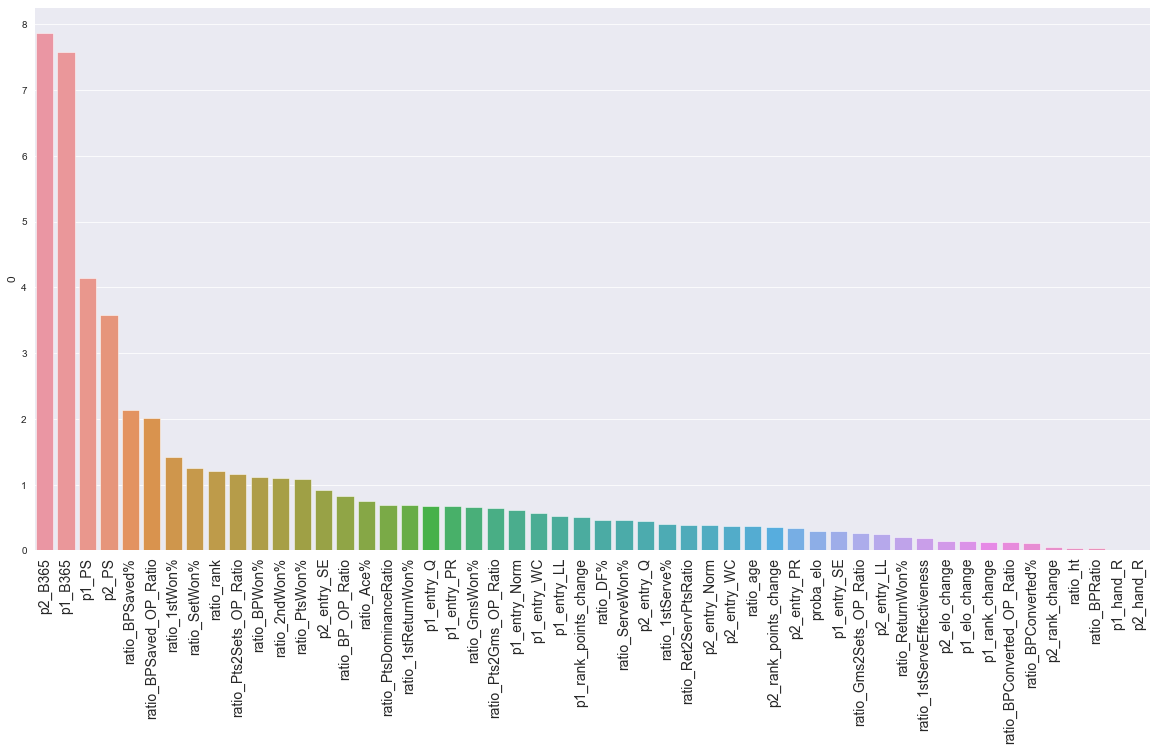

In [53]:
#Logistic regression
clf_lr = LogisticRegression(max_iter=1000, n_jobs=-1)
params_lr = {'solver' : ['liblinear', 'lbfgs'], 'C' : [10**(i) for i in range(-4, 3)]}
gridcv = GridSearchCV(clf_lr, param_grid=params_lr, cv=3, n_jobs=-1)
gridcv.fit(X_train[reduced_features], y_train)
print('Logistic regression gridsearchcv best params : ', gridcv.best_params_)
print('Logistic regression accuracy score : ', gridcv.score(X_test[reduced_features], y_test))
pd.DataFrame(gridcv.cv_results_)[['param_C', 'param_solver', 'mean_test_score', 'std_test_score']]

importance = pd.DataFrame(np.abs(gridcv.best_estimator_.coef_[0]), index = data_reduced.columns)
importance = importance.sort_values(by=0, ascending=False)
plt.figure(figsize=(20,10))
sns.barplot(importance.index, np.abs(importance[0]))
plt.xticks(rotation = 90)
plt.xticks(fontsize = 14)
plt.show()

KNN accuracy score :  0.6579022782633616
Decision Tree train accuracy score :  0.6804048002865842
Decision Tree test accuracy score :  0.6793236853417395


C:\Users\Julien\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Random Forest train accuracy score :  0.6853304674905965
Random Forest test accuracy score :  0.6803266943688208


C:\Users\Julien\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[13:14:39] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBoost : 
               precision    recall  f1-score   support

           0       0.69      0.68      0.68      7037
           1       0.68      0.68      0.68      6921

    accuracy                           0.68     13958
   macro avg       0.68      0.68      0.68     13958
weighted avg       0.68      0.68      0.68     13958



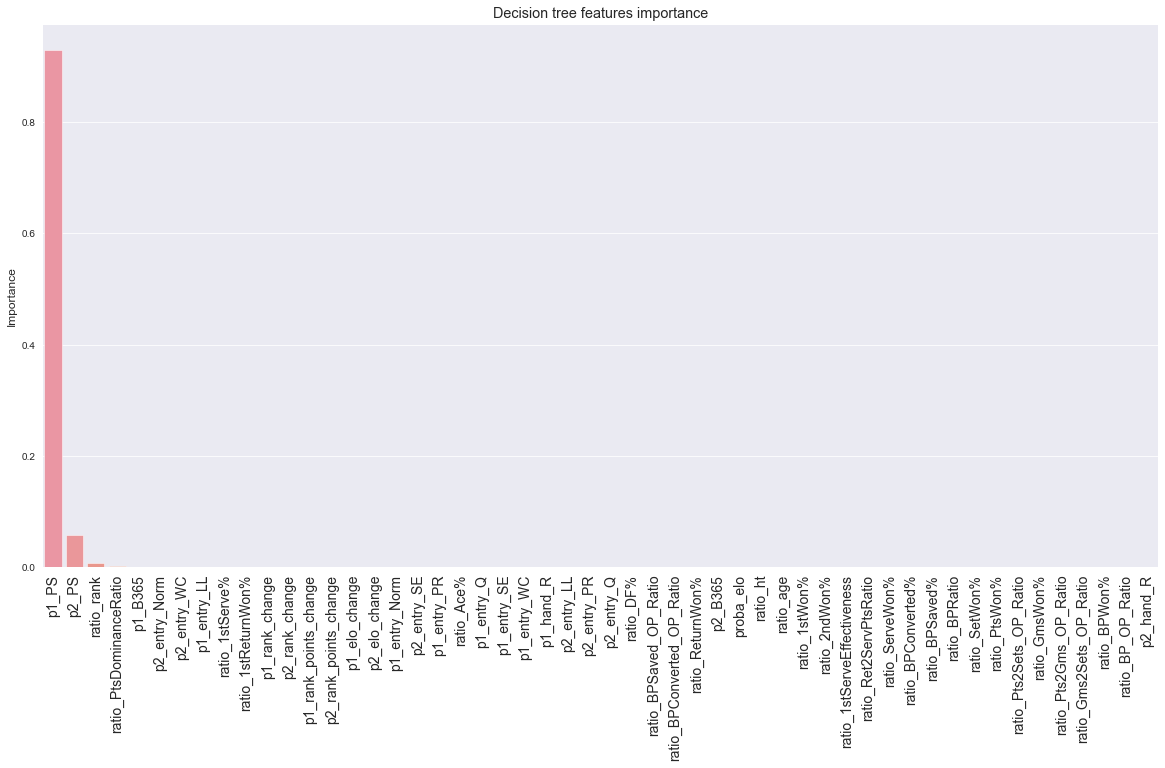

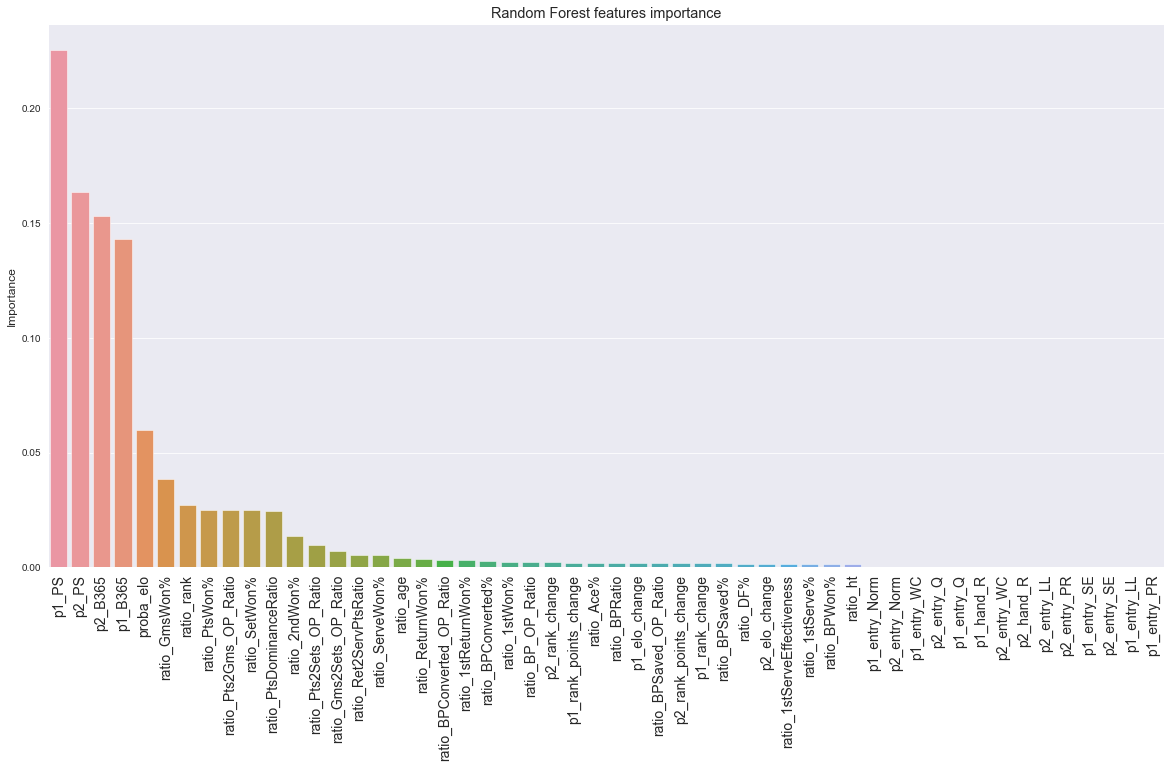

In [54]:
#KNN
knn = KNeighborsClassifier(n_neighbors = 50, metric = "euclidean") 
knn.fit(X_train[reduced_features],y_train);
print('KNN accuracy score : ', knn.score(X_test[reduced_features], y_test))

#Decision Tree
tree = DecisionTreeClassifier(max_depth=4)
tree.fit(X_train[reduced_features], y_train)
print("Decision Tree train accuracy score : ", tree.score(X_train[reduced_features], y_train))
print("Decision Tree test accuracy score : ", tree.score(X_test[reduced_features], y_test))
feature_importances = {}
for feature, importance in zip(data_reduced.columns, tree.feature_importances_):
    feature_importances[feature] = importance
importances = pd.DataFrame.from_dict(feature_importances, orient='index').rename({0:'Importance'}, axis=1)
importances = importances.sort_values(by='Importance',ascending=False)
plt.figure(figsize=(20,10))
sns.barplot(importances.index, importances['Importance'])
plt.xticks(rotation = 90)
plt.xticks(fontsize = 14)
plt.title('Decision tree features importance')

#Random Forest
rfc = ensemble.RandomForestClassifier(n_jobs=-1, max_depth=7, min_samples_leaf=0.001)
rfc.fit(X_train[reduced_features], y_train)
print("Random Forest train accuracy score : ", rfc.score(X_train[reduced_features], y_train))
print('Random Forest test accuracy score : ', rfc.score(X_test[reduced_features], y_test))
feature_importances = {}
for feature, importance in zip(data_reduced.columns, rfc.feature_importances_):
    feature_importances[feature] = importance
importances = pd.DataFrame.from_dict(feature_importances, orient='index').rename({0:'Importance'}, axis=1)
importances = importances.sort_values(by='Importance',ascending=False)
plt.figure(figsize=(20,10))
sns.barplot(importances.index, importances['Importance'])
plt.xticks(rotation = 90)
plt.xticks(fontsize = 14)
plt.title('Random Forest features importance');

#XGBoost
train = xgb.DMatrix(X_train[reduced_features], y_train)
test = xgb.DMatrix(X_test[reduced_features], y_test)
params_xgb = {'booster' : 'gbtree', 'learning_rate' : 0.01, 'objective' : 'binary:logistic', 'nthread' : -1}
xgb2 = xgb.train(params=params_xgb, dtrain=train, num_boost_round=1000, early_stopping_rounds= 15, evals=[(train, 'train'), (test, 'eval')], verbose_eval = 0)
xgb2_pred_proba = xgb2.predict(test)
xgb2_pred = pd.Series([1 if p>0.5 else 0 for p in xgb2_pred_proba])
print('XGBoost : \n', classification_report(y_test, xgb2_pred))

## Only with the in-game rolling features

Logistic regression gridsearchcv best params :  {'C': 100, 'solver': 'lbfgs'}
Logistic regression accuracy score :  0.650737928069924


C:\Users\Julien\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


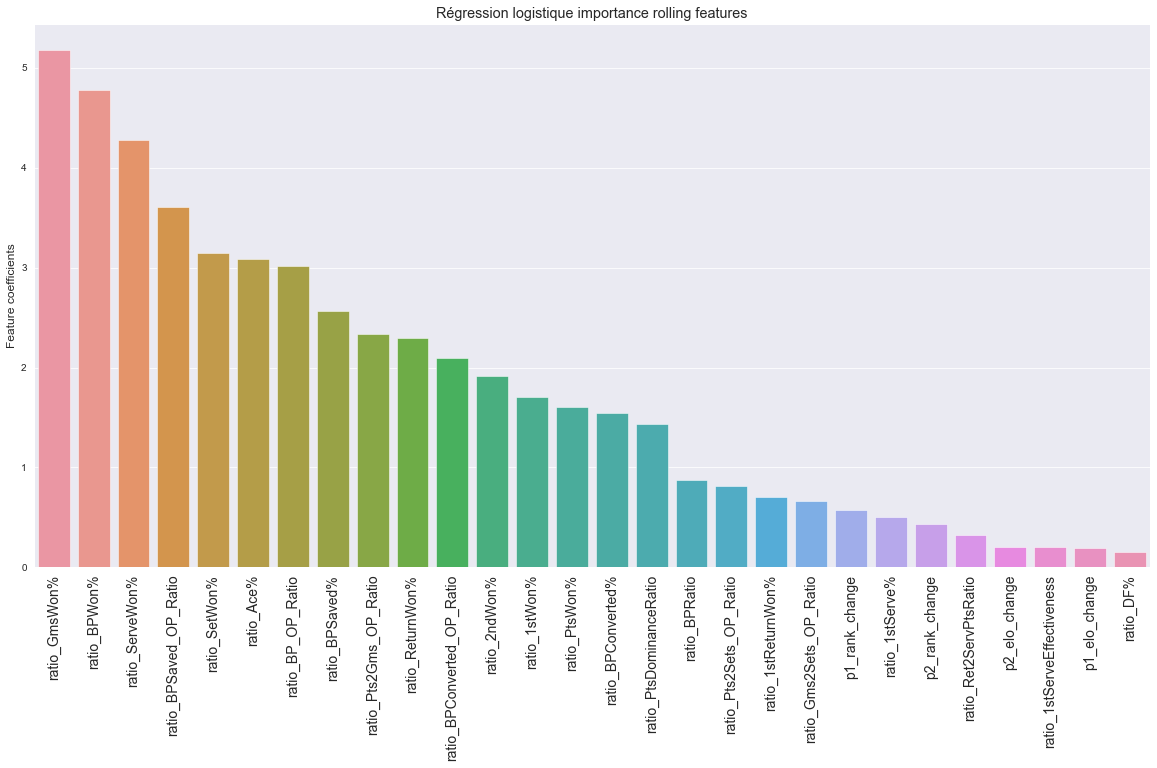

In [55]:
rolling_features = ['ratio_1stWon%',
'ratio_2ndWon%',
'ratio_1stServeEffectiveness',
'ratio_Ret2ServPtsRatio',
'ratio_ServeWon%',
'ratio_ReturnWon%',
'ratio_PtsDominanceRatio',
'ratio_BPConverted%',
'ratio_SetWon%',
'ratio_PtsWon%',
'ratio_Pts2Sets_OP_Ratio',
'ratio_GmsWon%',
'ratio_Pts2Gms_OP_Ratio',
'ratio_Gms2Sets_OP_Ratio',
'ratio_BPWon%',
'ratio_BP_OP_Ratio',
'ratio_BPSaved%',
'ratio_BPSaved_OP_Ratio',
'ratio_BPConverted_OP_Ratio',
'ratio_Ace%',
'ratio_DF%',
'ratio_1stServe%',
'ratio_1stReturnWon%',
'ratio_BPRatio',
#'ratio_UpsetScored',
#'ratio_UpsetAgainst',
'p1_rank_change', 'p2_rank_change', 'p1_elo_change', 'p2_elo_change']
data_rolling = data[rolling_features]

clf_lr = LogisticRegression(max_iter=1000, n_jobs=-1)
params_lr = {'solver' : ['liblinear', 'lbfgs'], 'C' : [10**(i) for i in range(-4, 3)]}
#params_lr = [{'solver' : ['liblinear', 'lbfgs'], 'penalty' : ['l2'], 'C' : [0.1, 1, 5, 10, 50, 80, 100, 200, 500]}, {'solver' : ['saga'], 'penalty' : ['elasticnet'], 'C' : [0.1, 1, 5, 10, 50, 80, 100, 200, 500], 'l1_ratio' : [0, 0.25,0.5,0.75,1]}]
gridcv = GridSearchCV(clf_lr, param_grid=params_lr, cv=3, n_jobs=-1)
gridcv.fit(X_train[rolling_features], y_train)
print('Logistic regression gridsearchcv best params : ', gridcv.best_params_)
pd.DataFrame(gridcv.cv_results_)[['param_C', 'param_solver', 'mean_test_score', 'std_test_score']]
print('Logistic regression accuracy score : ', gridcv.score(X_test[rolling_features], y_test))

lr_InGameFeatures = gridcv.best_estimator_
importance = pd.DataFrame(np.abs(lr_InGameFeatures.coef_[0]), index = data_rolling.columns)
importance = importance.sort_values(by=0, ascending=False)
plt.figure(figsize=(20,10))
sns.barplot(importance.index, np.abs(importance[0]))
plt.xticks(rotation = 90)
plt.xticks(fontsize = 14)
plt.ylabel("Feature coefficients")
plt.title('Régression logistique importance rolling features');

KNN accuracy score :  0.6461527439461241
Decision Tree train accuracy score :  0.6491850259716998
Decision Tree test accuracy score :  0.6460811004441898


C:\Users\Julien\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Random Forest train accuracy score :  0.6589109797599857
Random Forest test accuracy score :  0.6480154749964179


C:\Users\Julien\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[13:19:50] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBoost : 
               precision    recall  f1-score   support

           0       0.65      0.65      0.65      7037
           1       0.65      0.65      0.65      6921

    accuracy                           0.65     13958
   macro avg       0.65      0.65      0.65     13958
weighted avg       0.65      0.65      0.65     13958



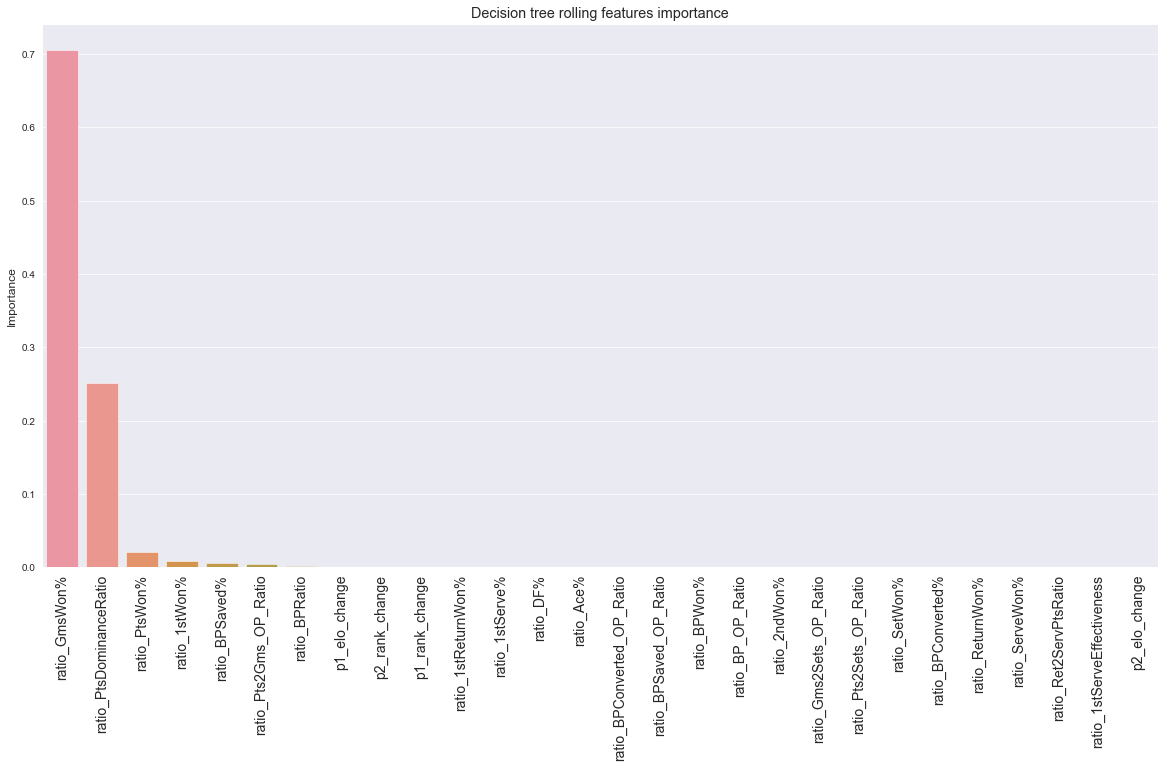

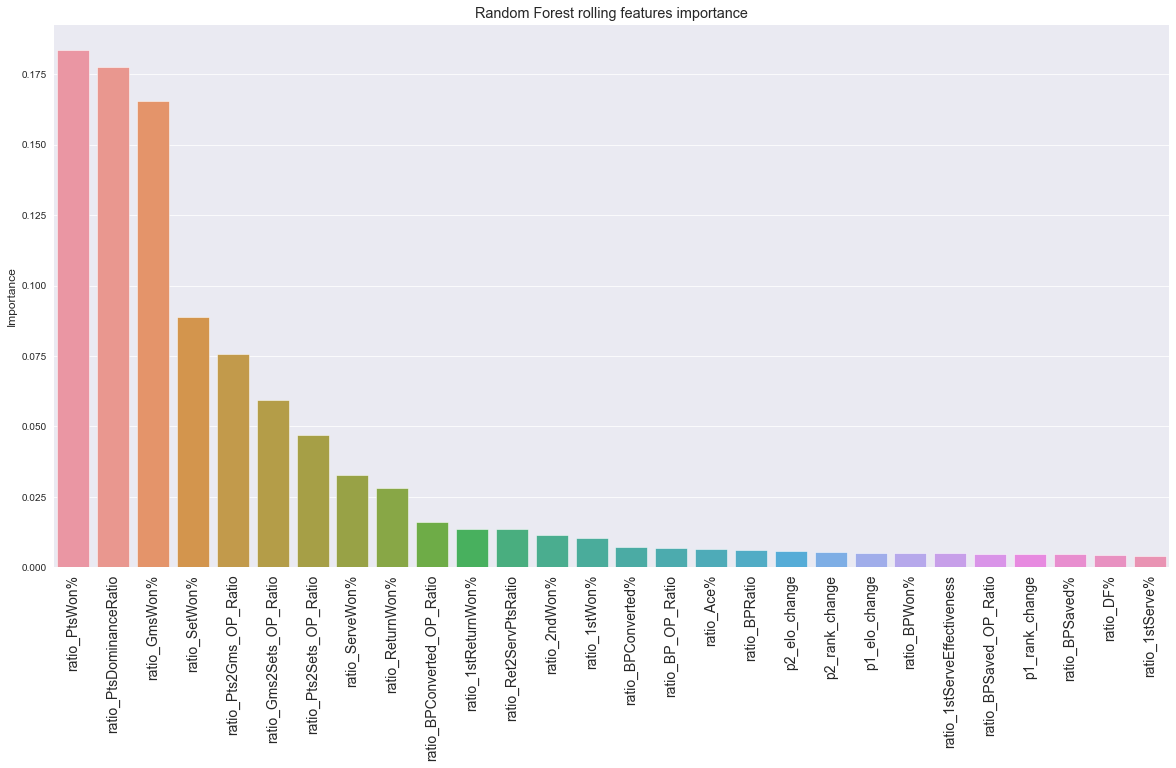

In [56]:
#KNN
knn = KNeighborsClassifier(n_neighbors  = 100, metric = "euclidean") 
knn.fit(X_train[rolling_features],y_train);
print('KNN accuracy score : ', knn.score(X_test[rolling_features], y_test))

#Decision Tree
tree = DecisionTreeClassifier(max_depth=4)
tree.fit(X_train[rolling_features], y_train)
print("Decision Tree train accuracy score : ", tree.score(X_train[rolling_features], y_train))
print("Decision Tree test accuracy score : ", tree.score(X_test[rolling_features], y_test))
feature_importances = {}
for feature, importance in zip(data_rolling.columns, tree.feature_importances_):
    feature_importances[feature] = importance
importances = pd.DataFrame.from_dict(feature_importances, orient='index').rename({0:'Importance'}, axis=1)
importances = importances.sort_values(by='Importance',ascending=False)
plt.figure(figsize=(20,10))
sns.barplot(importances.index, importances['Importance'])
plt.xticks(rotation = 90)
plt.xticks(fontsize = 14)
plt.title('Decision tree rolling features importance')

#Random Forest
rfc = ensemble.RandomForestClassifier(n_jobs=-1, max_depth=7, min_samples_leaf=0.001)
rfc.fit(X_train[rolling_features], y_train)
print("Random Forest train accuracy score : ", rfc.score(X_train[rolling_features], y_train))
print('Random Forest test accuracy score : ', rfc.score(X_test[rolling_features], y_test))
feature_importances = {}
for feature, importance in zip(data_rolling.columns, rfc.feature_importances_):
    feature_importances[feature] = importance
importances = pd.DataFrame.from_dict(feature_importances, orient='index').rename({0:'Importance'}, axis=1)
importances = importances.sort_values(by='Importance',ascending=False)
plt.figure(figsize=(20,10))
sns.barplot(importances.index, importances['Importance'])
plt.xticks(rotation = 90)
plt.xticks(fontsize = 14)
plt.title('Random Forest rolling features importance')

#XGBoost
train = xgb.DMatrix(X_train[rolling_features], y_train)
test = xgb.DMatrix(X_test[rolling_features], y_test)
params_xgb = {'booster' : 'gbtree', 'learning_rate' : 0.01, 'objective' : 'binary:logistic', 'nthread' : -1}
xgb3 = xgb.train(params=params_xgb, dtrain=train, num_boost_round=1000, early_stopping_rounds= 10, evals=[(train, 'train'), (test, 'eval')], verbose_eval = 0)
xgb3_pred_proba = xgb3.predict(test)
xgb3_pred = pd.Series([1 if p>0.5 else 0 for p in xgb3_pred_proba])
print('XGBoost : \n', classification_report(y_test, xgb3_pred))

C:\Users\Julien\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'XGBoost rolling features importance (gain)')

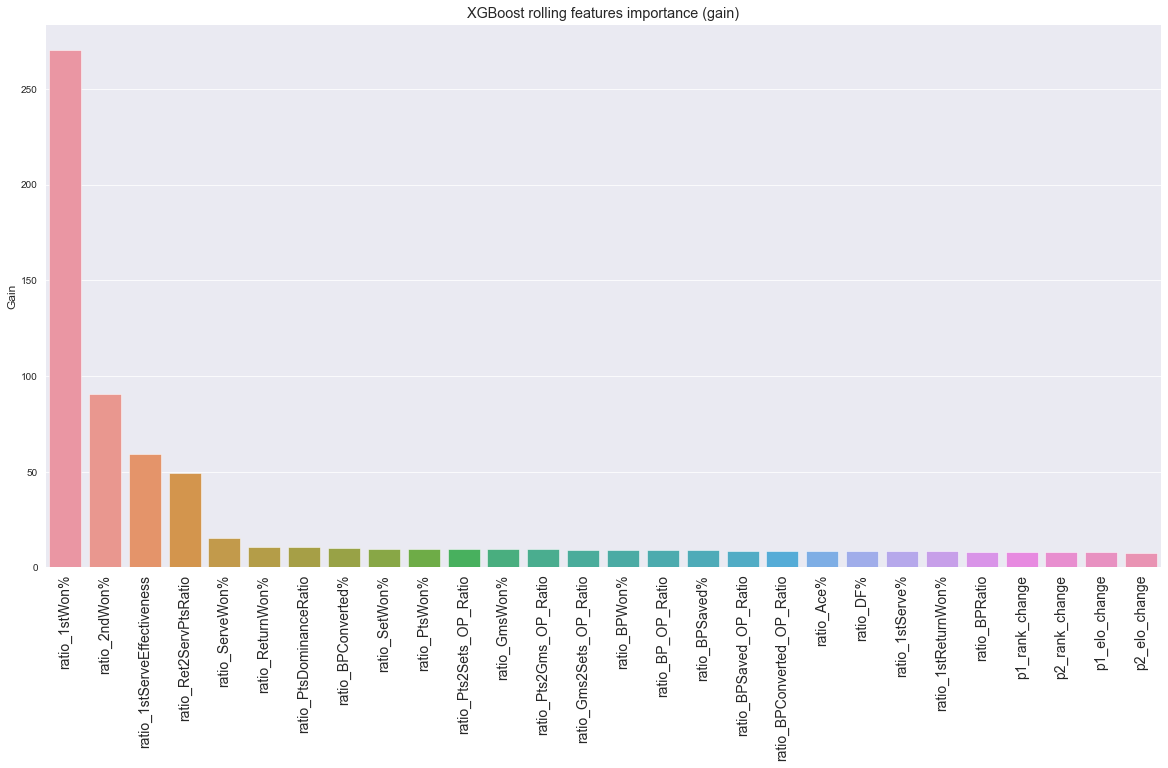

In [57]:
importance_gain = xgb3.get_score(importance_type='gain')
plt.figure(figsize=(20,10))
sns.barplot(list(importance_gain.keys()), sorted(importance_gain.values(), reverse=True))
plt.xticks(rotation = 90)
plt.xticks(fontsize = 14)
plt.ylabel('Gain')
plt.title('XGBoost rolling features importance (gain)')

C:\Users\Julien\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'XGBoost rolling features importance (cover)')

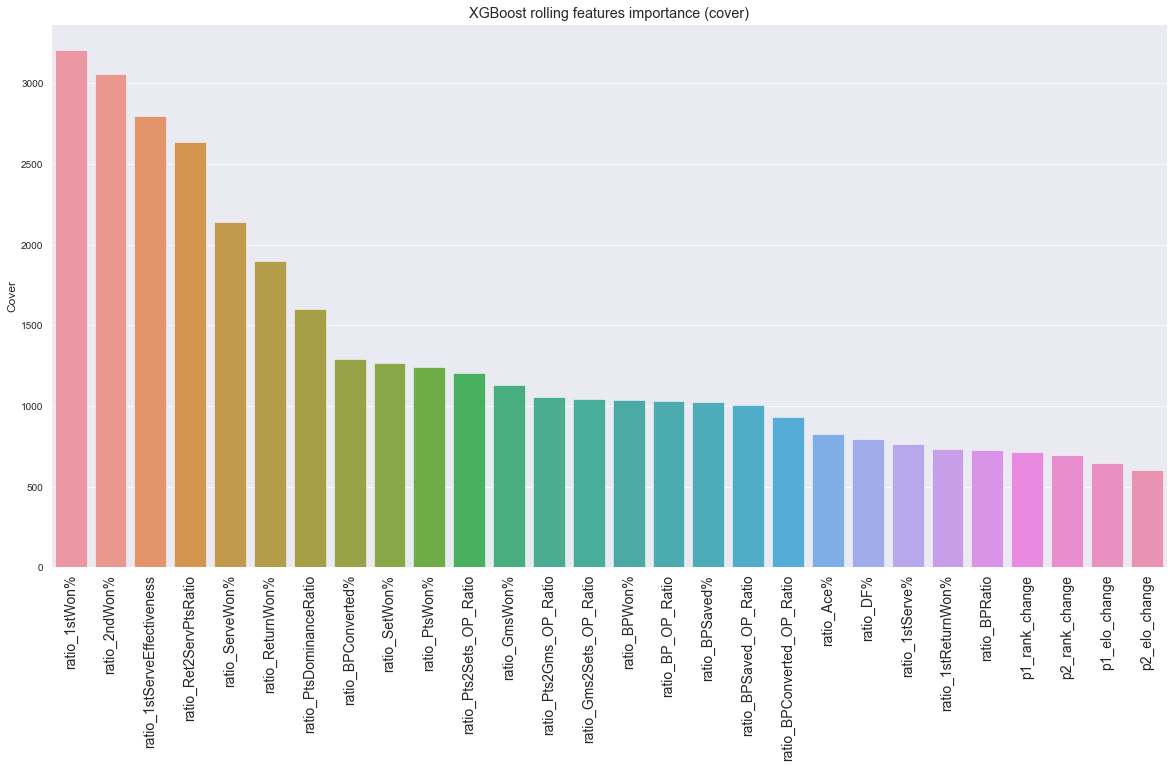

In [58]:
importance_cover = xgb3.get_score(importance_type='cover')
plt.figure(figsize=(20,10))
sns.barplot(list(importance_cover.keys()), sorted(importance_cover.values(), reverse=True))
plt.xticks(rotation = 90)
plt.xticks(fontsize = 14)
plt.ylabel('Cover')
plt.title('XGBoost rolling features importance (cover)')

C:\Users\Julien\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'XGBoost rolling features importance (weight)')

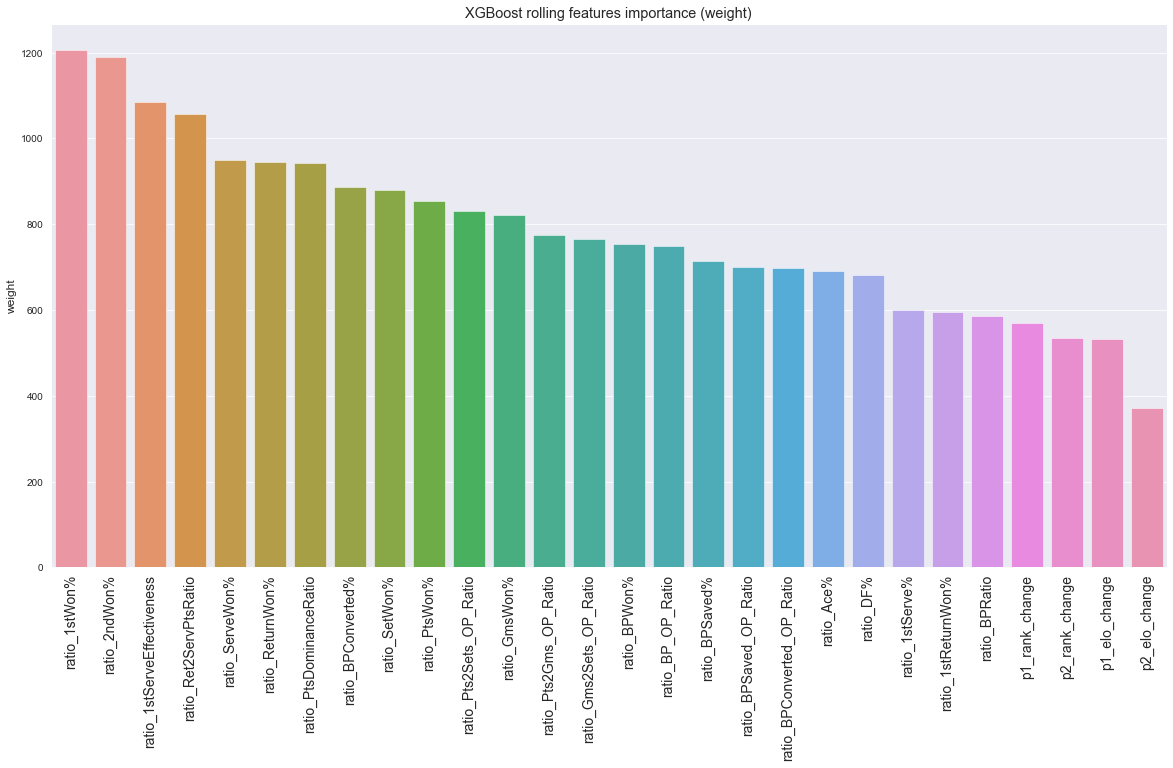

In [59]:
importance_weight = xgb3.get_score(importance_type='weight')
plt.figure(figsize=(20,10))
sns.barplot(list(importance_weight.keys()), sorted(importance_weight.values(), reverse=True))
plt.xticks(rotation = 90)
plt.xticks(fontsize = 14)
plt.ylabel('weight')
plt.title('XGBoost rolling features importance (weight)')

In [60]:
#Performances summary
results_summary_InGame = pd.DataFrame({'Precision' : np.array([gridcv.score(X_test[rolling_features], y_test), knn.score(X_test[rolling_features], y_test), tree.score(X_test[rolling_features], y_test), rfc.score(X_test[rolling_features], y_test), classification_report(y_test, xgb3_pred, output_dict=True)['macro avg']['precision']])}, 
             index=['Logistic regression', 'KNN (100 neighbors)', 'Decision Tree (depth=4)', 'Random forest', 'XGBoost'])

results_summary_InGame.style.format({'Precision': '{:,.2%}'.format})

,Precision
Logistic regression,65.07%
KNN (100 neighbors),64.62%
Decision Tree (depth=4),64.61%
Random forest,64.80%
XGBoost,65.09%


In [61]:
#Performances summary with different windows
df10 = pd.read_csv('results_summary_InGame_w10.csv', index_col=0)
df20 = pd.read_csv('results_summary_InGame_w20.csv', index_col=0)
df30 = pd.read_csv('results_summary_InGame_w30.csv', index_col=0)
df50 = pd.read_csv('results_summary_InGame_w50.csv', index_col=0)
df60 = pd.read_csv('results_summary_InGame_w60.csv', index_col=0)
df80 = pd.read_csv('results_summary_InGame_w80.csv', index_col=0)

results_summary_global = pd.concat([df10, df20, df30, df50, df60, df80], axis=1)
results_summary_global.style.format({'Precision (w=10)': '{:,.2%}'.format, 
                                     'Precision (w=20)': '{:,.2%}'.format,
                                    'Precision (w=30)': '{:,.2%}'.format,
                                    'Precision (w=50)': '{:,.2%}'.format,
                                    'Precision (w=60)': '{:,.2%}'.format,
                                    'Precision (w=80)': '{:,.2%}'.format})

,Precision (w=10),Precision (w=20),Precision (w=30),Precision (w=50),Precision (w=60),Precision (w=80)
Logistic regression,62.41%,64.10%,64.69%,65.02%,65.62%,64.97%
KNN (50 neighbors),61.65%,63.37%,63.51%,64.14%,64.83%,64.31%
Decision Tree (depth=4),62.17%,64.00%,63.93%,64.92%,64.96%,64.35%
Random forest,61.82%,63.28%,64.01%,64.26%,64.41%,63.93%
XGBoost,62.36%,64.10%,64.57%,64.97%,65.35%,65.07%


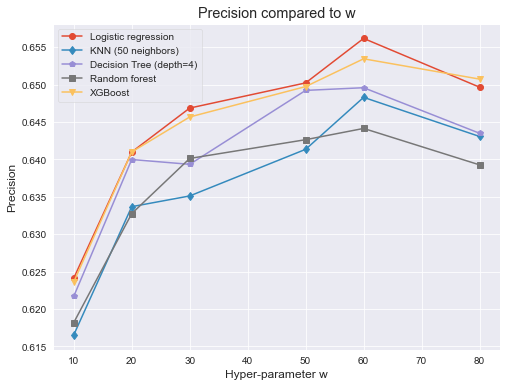

In [62]:
plt.figure(figsize=(8,6))
plt.plot([10, 20, 30, 50, 60, 80], results_summary_global.loc['Logistic regression', :], label='Logistic regression', marker='o')
plt.plot([10, 20, 30, 50, 60, 80], results_summary_global.loc['KNN (50 neighbors)', :], label='KNN (50 neighbors)', marker='d')
plt.plot([10, 20, 30, 50, 60, 80], results_summary_global.loc['Decision Tree (depth=4)', :], label='Decision Tree (depth=4)', marker='p')
plt.plot([10, 20, 30, 50, 60, 80], results_summary_global.loc['Random forest', :], label='Random forest', marker='s')
plt.plot([10, 20, 30, 50, 60, 80], results_summary_global.loc['XGBoost', :], label='XGBoost', marker='v')
plt.legend()
plt.xlabel('Hyper-parameter w')
plt.ylabel('Precision')
plt.title('Precision compared to w');

## Without bookmakers

C:\Users\Julien\miniconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1523: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(


Logistic regression gridsearchcv best params :  {'C': 10, 'solver': 'liblinear'}
Logistic regression accuracy score :  0.6651382719587333


C:\Users\Julien\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


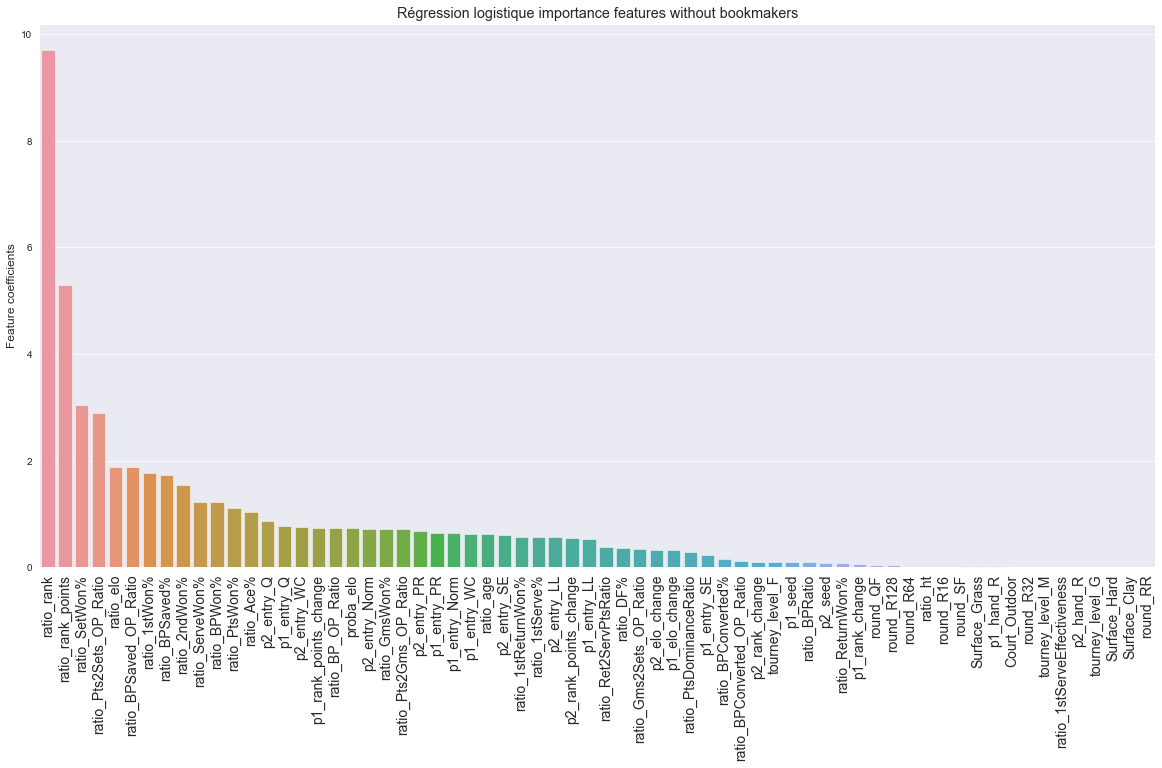

In [63]:
data_without_bookmakers = data.drop(['p1_B365', 'p2_B365', 'p1_PS', 'p2_PS'], axis=1)
feature_without_bookmakers = data_without_bookmakers.columns

clf_lr = LogisticRegression(max_iter=1000, n_jobs=-1)
params_lr = {'solver' : ['liblinear', 'lbfgs'], 'C' : [10**(i) for i in range(-4, 3)]}
#params_lr1 = [{'solver' : ['liblinear', 'lbfgs'], 'penalty' : ['l2'], 'C' : [0.1, 1, 5, 10, 50, 80, 100, 200, 500]}, {'solver' : ['saga'], 'penalty' : ['elasticnet'], 'C' : [0.1, 1, 5, 10, 50, 80, 100, 200, 500], 'l1_ratio' : [0, 0.25,0.5,0.75,1]}]
gridcv = GridSearchCV(clf_lr, param_grid=params_lr, cv=3, n_jobs=-1)
gridcv.fit(X_train[feature_without_bookmakers], y_train)
print('Logistic regression gridsearchcv best params : ', gridcv.best_params_)
print('Logistic regression accuracy score : ', gridcv.score(X_test[feature_without_bookmakers], y_test))

lr_withoutBookmakers = gridcv.best_estimator_
importance = pd.DataFrame(np.abs(lr_withoutBookmakers.coef_[0]), index = data_without_bookmakers.columns)
importance = importance.sort_values(by=0, ascending=False)
plt.figure(figsize=(20,10))
sns.barplot(importance.index, np.abs(importance[0]))
plt.xticks(rotation = 90)
plt.xticks(fontsize = 14)
plt.ylabel("Feature coefficients")
plt.title('Régression logistique importance features without bookmakers');

KNN accuracy score :  0.6485169795099585
Decision Tree train accuracy score :  0.661651441877127
Decision Tree test accuracy score :  0.6584037827769021


C:\Users\Julien\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Random Forest train accuracy score :  0.6731148128246462
Random Forest test accuracy score :  0.6645651239432584


C:\Users\Julien\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[13:23:30] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBoost : 
               precision    recall  f1-score   support

           0       0.67      0.67      0.67      7037
           1       0.66      0.67      0.66      6921

    accuracy                           0.67     13958
   macro avg       0.67      0.67      0.67     13958
weighted avg       0.67      0.67      0.67     13958



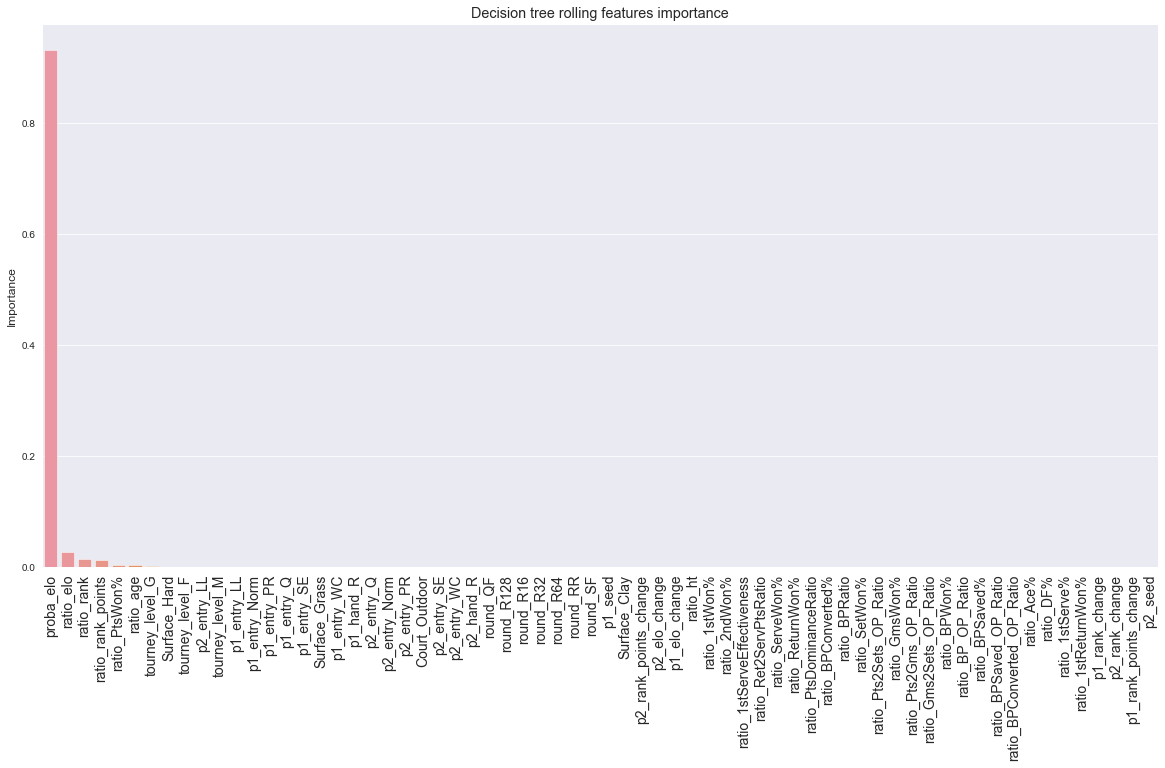

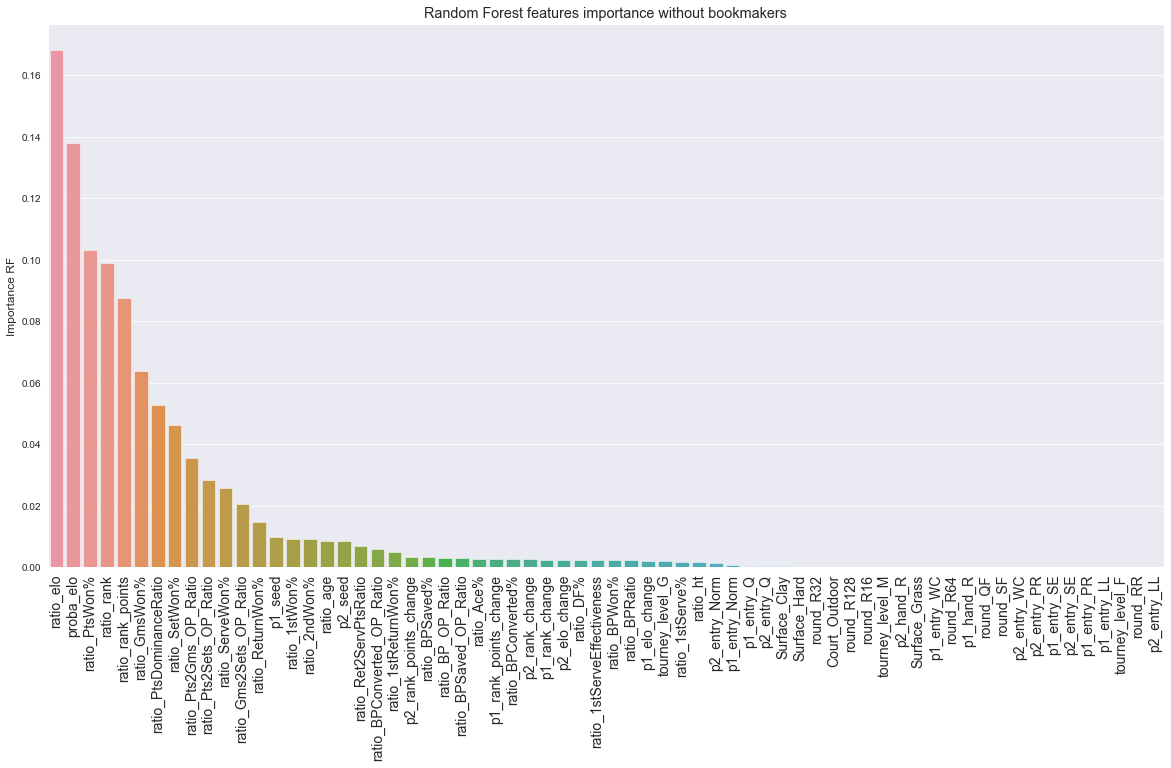

In [64]:
#KNN
knn = KNeighborsClassifier(n_neighbors  = 100, metric = "euclidean") 
knn.fit(X_train[feature_without_bookmakers],y_train);
print('KNN accuracy score : ', knn.score(X_test[feature_without_bookmakers], y_test))

#Decision Tree
tree = DecisionTreeClassifier(max_depth=4)
tree.fit(X_train[feature_without_bookmakers], y_train)
print("Decision Tree train accuracy score : ", tree.score(X_train[feature_without_bookmakers], y_train))
print("Decision Tree test accuracy score : ", tree.score(X_test[feature_without_bookmakers], y_test))
feature_importances = {}
for feature, importance in zip(data_without_bookmakers.columns, tree.feature_importances_):
    feature_importances[feature] = importance
importances = pd.DataFrame.from_dict(feature_importances, orient='index').rename({0:'Importance'}, axis=1)
importances = importances.sort_values(by='Importance',ascending=False)
plt.figure(figsize=(20,10))
sns.barplot(importances.index, importances['Importance'])
plt.xticks(rotation = 90)
plt.xticks(fontsize = 14)
plt.title('Decision tree rolling features importance')

#Random Forest
rfc = ensemble.RandomForestClassifier(n_jobs=-1, max_depth=7, min_samples_leaf=0.001)
rfc.fit(X_train[feature_without_bookmakers], y_train)
print("Random Forest train accuracy score : ", rfc.score(X_train[feature_without_bookmakers], y_train))
print('Random Forest test accuracy score : ', rfc.score(X_test[feature_without_bookmakers], y_test))
feature_importances = {}
for feature, importance in zip(data_without_bookmakers.columns, rfc.feature_importances_):
    feature_importances[feature] = importance
importances = pd.DataFrame.from_dict(feature_importances, orient='index').rename({0:'Importance RF'}, axis=1)
importances = importances.sort_values(by='Importance RF',ascending=False)
plt.figure(figsize=(20,10))
sns.barplot(importances.index, importances['Importance RF'])
plt.xticks(rotation = 90)
plt.xticks(fontsize = 14)
plt.title('Random Forest features importance without bookmakers');
importances.head(30)

#XGBoost
train = xgb.DMatrix(X_train[feature_without_bookmakers], y_train)
test = xgb.DMatrix(X_test[feature_without_bookmakers], y_test)
params_xgb = {'booster' : 'gbtree', 'learning_rate' : 0.01, 'objective' : 'binary:logistic', 'nthread' : -1}
xgb4 = xgb.train(params=params_xgb, dtrain=train, num_boost_round=1000, early_stopping_rounds= 15, evals=[(train, 'train'), (test, 'eval')], verbose_eval = 0)
xgb4_pred_proba = xgb4.predict(test)
xgb4_pred = pd.Series([1 if p>0.5 else 0 for p in xgb4_pred_proba])
print('XGBoost : \n', classification_report(y_test, xgb4_pred))

In [65]:
#Performances summary
results_summary_withoutBookies = pd.DataFrame({'Precision' : np.array([gridcv.score(X_test[feature_without_bookmakers], y_test), knn.score(X_test[feature_without_bookmakers], y_test), tree.score(X_test[feature_without_bookmakers], y_test), rfc.score(X_test[feature_without_bookmakers], y_test), classification_report(y_test, xgb4_pred, output_dict=True)['macro avg']['precision']])}, 
             index=['Logistic regression', 'KNN (50 neighbors)', 'Decision Tree (depth=4)', 'Random forest', 'XGBoost'])

results_summary_withoutBookies.style.format({'Precision': '{:,.2%}'.format})

,Precision
Logistic regression,66.51%
KNN (50 neighbors),64.85%
Decision Tree (depth=4),65.84%
Random forest,66.46%
XGBoost,66.63%


In [68]:
#Performances summary with different windows
df10_withoutBookies = pd.read_csv('results_summary_withoutBookies_w10.csv', index_col=0)
df20_withoutBookies = pd.read_csv('results_summary_withoutBookies_w20.csv', index_col=0)
df30_withoutBookies = pd.read_csv('results_summary_withoutBookies_w30.csv', index_col=0)
df50_withoutBookies = pd.read_csv('results_summary_withoutBookies_w50.csv', index_col=0)
df60_withoutBookies = pd.read_csv('results_summary_withoutBookies_w60.csv', index_col=0)

results_summary_global_withoutBookies = pd.concat([df10_withoutBookies, df20_withoutBookies, df30_withoutBookies, df50_withoutBookies, df60_withoutBookies], axis=1)
results_summary_global_withoutBookies.style.format({'Precision (w=10)': '{:,.2%}'.format, 
                                     'Precision (w=20)': '{:,.2%}'.format,
                                    'Precision (w=30)': '{:,.2%}'.format,
                                    'Precision (w=50)': '{:,.2%}'.format,
                                    'Precision (w=60)': '{:,.2%}'.format})

,Precision (w=10),Precision (w=20),Precision (w=30),Precision (w=50),Precision (w=60)
Logistic regression,66.65%,66.19%,66.37%,66.60%,66.58%
KNN (50 neighbors),61.13%,61.03%,60.93%,60.62%,60.72%
Decision Tree (depth=4),65.92%,65.92%,66.00%,65.88%,65.83%
Random forest,66.22%,65.61%,65.85%,65.68%,66.26%
XGBoost,66.82%,66.82%,66.75%,66.79%,66.64%


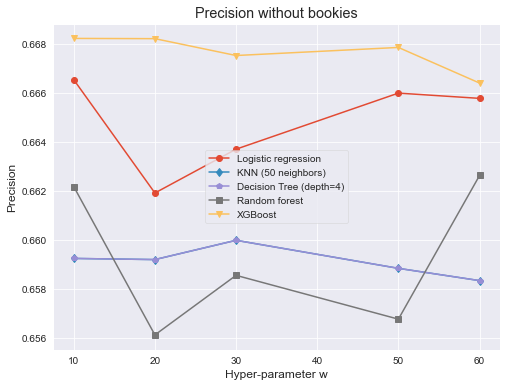

In [69]:
plt.figure(figsize=(8,6))
plt.plot([10, 20, 30, 50, 60], results_summary_global_withoutBookies.loc['Logistic regression', :], label='Logistic regression', marker='o')
plt.plot([10, 20, 30, 50, 60], results_summary_global_withoutBookies.loc['Decision Tree (depth=4)', :], label='KNN (50 neighbors)', marker='d')
plt.plot([10, 20, 30, 50, 60], results_summary_global_withoutBookies.loc['Decision Tree (depth=4)', :], label='Decision Tree (depth=4)', marker='p')
plt.plot([10, 20, 30, 50, 60], results_summary_global_withoutBookies.loc['Random forest', :], label='Random forest', marker='s')
plt.plot([10, 20, 30, 50, 60], results_summary_global_withoutBookies.loc['XGBoost', :], label='XGBoost', marker='v')
plt.legend()
plt.xlabel('Hyper-parameter w')
plt.ylabel('Precision')
plt.title('Precision without bookies');

## Betting strategies

In [165]:
# First let's compare our predictions (with first logreg ie all features) vs bookmakers

#First we need to apply our scaler to our entire dataset
data_num_scaled = pd.DataFrame(scaler.transform(df_num), index=data.index, columns=df_num.columns)
data_scaled = pd.concat([data_num_scaled, df_not_num], axis=1)
y_pred_lr = lr_best_estimator.predict(data_scaled)
y_pred_lr_proba = pd.DataFrame(lr_best_estimator.predict_proba(data_scaled), index=data.index)

proba_B365 = 1 / df['p1_B365']
proba_B365 = pd.concat([proba_B365, 1 / df['p2_B365']], axis=1)

proba_B365['B365_pred'] = [1 if (row['p1_B365'] > row['p2_B365']) else 0 for i, row in proba_B365.iterrows()]

proba_PS = 1 / df['p1_PS']
proba_PS = pd.concat([proba_PS, 1 / df['p2_PS']], axis=1)

proba_PS['PS_pred'] = [1 if (row['p1_PS'] > row['p2_PS']) else 0 for i, row in proba_PS.iterrows()]

VSbookmakers_pred = pd.concat([proba_B365.reset_index(drop=True), proba_PS.reset_index(drop=True), target], axis=1)

VSbookmakers_pred['logreg_p1'] = y_pred_lr_proba[1].reset_index(drop=True)
VSbookmakers_pred['logreg_p2'] = y_pred_lr_proba[0].reset_index(drop=True)
VSbookmakers_pred['logreg_pred'] = y_pred_lr
VSbookmakers_pred['Diff_B365_logreg_p1'] = VSbookmakers_pred['p1_B365'] - VSbookmakers_pred['logreg_p1'] 
VSbookmakers_pred['Diff_B365_logreg_p2'] = VSbookmakers_pred['p2_B365'] - VSbookmakers_pred['logreg_p2']
VSbookmakers_pred['Diff_PS_logreg_p1'] = VSbookmakers_pred['p1_PS'] - VSbookmakers_pred['logreg_p1'] 
VSbookmakers_pred['Diff_PS_logreg_p2'] = VSbookmakers_pred['p2_PS'] - VSbookmakers_pred['logreg_p2']

In [166]:
crosstab_B365 = pd.crosstab(VSbookmakers_pred['logreg_pred'], VSbookmakers_pred['B365_pred'], rownames=['Predicted with logreg'], colnames=['Predicted by B365'])
crosstab_B365 

Predicted by B365,0,1
Predicted with logreg,,
0,33372,1671
1,2239,32506


In [167]:
print('Outcomes identically predicted by logreg and B365 :', (crosstab_B365 .iloc[0,0] + crosstab_B365 .iloc[1,1])/crosstab_B365 .values.sum())
print('Precision : ', crosstab_B365 .iloc[1,1] / crosstab_B365 .iloc[:,1].sum())
print('Recall : ', crosstab_B365 .iloc[1,1] / crosstab_B365.iloc[:,1].sum())

Outcomes identically predicted by logreg and B365 : 0.9439731759041669
Precision :  0.9511074699359218
Recall :  0.9511074699359218


In [168]:
#Cases where we correctly predict a victory whereas B365 predicts a defeat
VSbookmakers_pred[(VSbookmakers_pred['B365_pred'] == 0) & (y_pred_lr == True) & (VSbookmakers_pred['p1_win'] == VSbookmakers_pred['logreg_pred'])]
#It's balanced

,p1_B365,p2_B365,B365_pred,p1_PS,p2_PS,PS_pred,p1_win,logreg_p1,logreg_p2,logreg_pred,Diff_B365_logreg_p1,Diff_B365_logreg_p2,Diff_PS_logreg_p1,Diff_PS_logreg_p2
9,0.500000,0.500000,0,0.500000,0.500000,0,1,0.579303,0.420697,1,-0.079303,0.079303,-0.079303,0.079303
10,0.500000,0.500000,0,0.500000,0.500000,0,1,0.718487,0.281513,1,-0.218487,0.218487,-0.218487,0.218487
11,0.476990,0.523010,0,0.476990,0.523010,0,1,0.538416,0.461584,1,-0.061426,0.061426,-0.061426,0.061426
16,0.476942,0.523058,0,0.476942,0.523058,0,1,0.509705,0.490295,1,-0.032764,0.032764,-0.032764,0.032764
21,0.479059,0.520941,0,0.479059,0.520941,0,1,0.539205,0.460795,1,-0.060146,0.060146,-0.060146,0.060146
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69276,0.526316,0.526316,0,0.526316,0.497512,1,1,0.521322,0.478678,1,0.004993,0.047638,0.004993,0.018835
69325,0.421941,0.636943,0,0.416667,0.606061,0,1,0.509324,0.490676,1,-0.087383,0.146266,-0.092657,0.115384
69361,0.476190,0.581395,0,0.456621,0.561798,0,1,0.521290,0.478710,1,-0.045099,0.102685,-0.064669,0.083088
69422,0.546448,0.546448,0,0.510204,0.518135,0,1,0.512425,0.487575,1,0.034023,0.058873,-0.002221,0.030560


In [169]:
#Cases where we correctly predict a defeat whereas B365 predicts a victory
VSbookmakers_pred[(VSbookmakers_pred['B365_pred'] == 1) & (y_pred_lr == False) & (VSbookmakers_pred['p1_win'] == VSbookmakers_pred['logreg_pred'])]
#It's balanced

,p1_B365,p2_B365,B365_pred,p1_PS,p2_PS,PS_pred,p1_win,logreg_p1,logreg_p2,logreg_pred,Diff_B365_logreg_p1,Diff_B365_logreg_p2,Diff_PS_logreg_p1,Diff_PS_logreg_p2
7,0.501971,0.498029,1,0.501971,0.498029,1,0,0.437183,0.562817,0,0.064788,-0.064788,0.064788,-0.064788
20,0.520941,0.479059,1,0.520941,0.479059,1,0,0.466299,0.533701,0,0.054642,-0.054642,0.054642,-0.054642
34,0.525144,0.474856,1,0.525144,0.474856,1,0,0.430050,0.569950,0,0.095095,-0.095095,0.095095,-0.095095
88,0.501104,0.498896,1,0.501104,0.498896,1,0,0.447700,0.552300,0,0.053404,-0.053404,0.053404,-0.053404
103,0.524155,0.475845,1,0.524155,0.475845,1,0,0.476143,0.523857,0,0.048012,-0.048012,0.048012,-0.048012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69228,0.555556,0.500000,1,0.505051,0.515464,0,0,0.488610,0.511390,0,0.066946,-0.011390,0.016441,0.004074
69281,0.602410,0.454545,1,0.564972,0.458716,1,0,0.487211,0.512789,0,0.115199,-0.058244,0.077761,-0.054074
69324,0.636943,0.421941,1,0.606061,0.416667,1,0,0.485403,0.514597,0,0.151540,-0.092656,0.120658,-0.097931
69360,0.581395,0.476190,1,0.561798,0.456621,1,0,0.480970,0.519030,0,0.100425,-0.042839,0.080827,-0.062409


In [170]:
#Let's look at the cases where we beat the bookmaker
we_beat_bookmaker = VSbookmakers_pred[(VSbookmakers_pred['B365_pred'] != VSbookmakers_pred['p1_win']) & (VSbookmakers_pred['p1_win'] == VSbookmakers_pred['logreg_pred'])]
we_beat_bookmaker.sort_values(by='Diff_B365_logreg_p1')

,p1_B365,p2_B365,B365_pred,p1_PS,p2_PS,PS_pred,p1_win,logreg_p1,logreg_p2,logreg_pred,Diff_B365_logreg_p1,Diff_B365_logreg_p2,Diff_PS_logreg_p1,Diff_PS_logreg_p2
69186,0.476190,0.602410,0,0.446429,0.584795,0,1,0.766904,0.233096,1,-0.290713,0.369314,-0.320475,0.351699
68597,0.500000,0.581395,0,0.469484,0.555556,0,1,0.758957,0.241043,1,-0.258957,0.340352,-0.289473,0.314512
68685,0.476190,0.602410,0,0.452489,0.571429,0,1,0.735028,0.264972,1,-0.258837,0.337437,-0.282539,0.306456
394,0.477190,0.522810,0,0.477190,0.522810,0,1,0.715460,0.284540,1,-0.238270,0.238270,-0.238270,0.238270
58189,0.307692,0.751880,0,0.266667,0.757576,0,1,0.540563,0.459437,1,-0.232870,0.292442,-0.273896,0.298138
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53487,0.636943,0.421941,1,0.602410,0.416667,1,0,0.438684,0.561316,0,0.198258,-0.139375,0.163725,-0.144649
23070,0.636943,0.444444,1,0.557414,0.462963,1,0,0.391835,0.608165,0,0.245108,-0.163721,0.165579,-0.145202
68684,0.602410,0.476190,1,0.571429,0.452489,1,0,0.335787,0.664213,0,0.266622,-0.188022,0.235641,-0.211724
68596,0.581395,0.500000,1,0.555556,0.469484,1,0,0.305372,0.694628,0,0.276023,-0.194628,0.250183,-0.225144


In [171]:
we_beat_bookmaker.describe()

,p1_B365,p2_B365,B365_pred,p1_PS,p2_PS,PS_pred,p1_win,logreg_p1,logreg_p2,logreg_pred,Diff_B365_logreg_p1,Diff_B365_logreg_p2,Diff_PS_logreg_p1,Diff_PS_logreg_p2
count,2005.000000,2005.000000,2005.000000,2005.000000,2005.000000,2005.000000,2005.000000,2005.000000,2005.000000,2005.000000,2005.000000,2005.000000,2005.000000,2005.000000
mean,0.525688,0.525527,0.428429,0.508227,0.508167,0.488778,0.571571,0.505324,0.494676,0.571571,0.020364,0.030851,0.002903,0.013491
std,0.049072,0.047421,0.494975,0.044096,0.043394,0.499999,0.494975,0.037223,0.037223,0.494975,0.073005,0.072920,0.068094,0.067790
min,0.307692,0.344533,0.000000,0.266667,0.344533,0.000000,0.000000,0.286205,0.233096,0.000000,-0.290713,-0.237605,-0.320475,-0.267366
25%,0.494010,0.495675,0.000000,0.480676,0.482090,0.000000,0.000000,0.484198,0.475719,0.000000,-0.033255,-0.029888,-0.046022,-0.039407
50%,0.526316,0.526316,0.000000,0.507357,0.506737,0.000000,1.000000,0.504402,0.495598,1.000000,0.018100,0.036070,-0.000186,0.020213
75%,0.555556,0.555556,1.000000,0.534759,0.534759,1.000000,1.000000,0.524281,0.515802,1.000000,0.080842,0.086123,0.054293,0.062115
max,0.666667,0.751880,1.000000,0.655467,0.757576,1.000000,1.000000,0.766904,0.713795,1.000000,0.316205,0.369314,0.298590,0.351699


In [172]:
#Let's look at the cases where we are beaten by the bookmaker
bookmakers_beat_us = VSbookmakers_pred[(VSbookmakers_pred['B365_pred'] == VSbookmakers_pred['p1_win']) & (VSbookmakers_pred['p1_win'] != VSbookmakers_pred['logreg_pred'])]
bookmakers_beat_us

,p1_B365,p2_B365,B365_pred,p1_PS,p2_PS,PS_pred,p1_win,logreg_p1,logreg_p2,logreg_pred,Diff_B365_logreg_p1,Diff_B365_logreg_p2,Diff_PS_logreg_p1,Diff_PS_logreg_p2
2,0.456132,0.543868,0,0.456132,0.543868,0,0,0.504351,0.495649,1,-0.048219,0.048219,-0.048219,0.048219
29,0.502168,0.497832,1,0.502168,0.497832,1,1,0.495407,0.504593,0,0.006761,-0.006761,0.006761,-0.006761
30,0.497832,0.502168,0,0.497832,0.502168,0,0,0.543795,0.456205,1,-0.045962,0.045962,-0.045962,0.045962
39,0.481121,0.518879,0,0.481121,0.518879,0,0,0.592276,0.407724,1,-0.111155,0.111155,-0.111155,0.111155
40,0.518879,0.481121,1,0.518879,0.481121,1,1,0.447219,0.552781,0,0.071660,-0.071660,0.071660,-0.071660
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69527,0.555556,0.526316,1,0.540541,0.487805,1,1,0.473009,0.526991,0,0.082547,-0.000675,0.067532,-0.039186
69652,0.546448,0.546448,0,0.485437,0.540541,0,0,0.526236,0.473764,1,0.020212,0.072684,-0.040799,0.066776
69723,0.546448,0.546448,0,0.546448,0.478469,1,0,0.530108,0.469892,1,0.016340,0.076556,0.016340,0.008577
69728,0.476190,0.602410,0,0.465116,0.558659,0,0,0.516135,0.483865,1,-0.039944,0.118545,-0.051019,0.074794


In [173]:
bookmakers_beat_us.describe()

,p1_B365,p2_B365,B365_pred,p1_PS,p2_PS,PS_pred,p1_win,logreg_p1,logreg_p2,logreg_pred,Diff_B365_logreg_p1,Diff_B365_logreg_p2,Diff_PS_logreg_p1,Diff_PS_logreg_p2
count,1905.000000,1905.000000,1905.000000,1905.000000,1905.000000,1905.000000,1905.000000,1905.000000,1905.000000,1905.000000,1905.000000,1905.000000,1905.000000,1905.000000
mean,0.526332,0.527699,0.426247,0.507882,0.509581,0.482415,0.426247,0.505936,0.494064,0.573753,0.020396,0.033635,0.001946,0.015517
std,0.051777,0.050250,0.494660,0.048522,0.048194,0.499822,0.494660,0.038035,0.038035,0.494660,0.076651,0.076320,0.073681,0.073561
min,0.285714,0.333333,0.000000,0.264550,0.350877,0.000000,0.000000,0.292185,0.165176,0.000000,-0.549110,-0.247839,-0.570274,-0.255326
25%,0.494565,0.499592,0.000000,0.478903,0.480602,0.000000,0.000000,0.485163,0.474864,0.000000,-0.033428,-0.028398,-0.049006,-0.041801
50%,0.526316,0.526316,0.000000,0.506690,0.507614,0.000000,0.000000,0.504390,0.495610,1.000000,0.017423,0.041255,-0.002520,0.022409
75%,0.555556,0.555556,1.000000,0.537153,0.537057,1.000000,1.000000,0.525136,0.514837,1.000000,0.082180,0.085957,0.055722,0.065473
max,0.735294,0.781250,1.000000,0.680272,0.759301,1.000000,1.000000,0.834824,0.707815,1.000000,0.316466,0.616074,0.282527,0.589541


In [174]:
#Strategy 0 : bet on the B365 predicted winner
VSbookmakers_pred["bet_result0"] = [(1/row['p1_B365']-1) if ((row['p1_B365'] > row['p2_B365']) and (row['p1_win']==True)) 
                                                           else ((1/row['p2_B365']-1) if ((row['p1_B365'] < row['p2_B365']) and (row['p1_win']==False))
                                                                                         else -1)
                                   for i, row in VSbookmakers_pred.iterrows()]

VSbookmakers_pred["p&l0"] = VSbookmakers_pred["bet_result0"].cumsum()
VSbookmakers_pred

,p1_B365,p2_B365,B365_pred,p1_PS,p2_PS,PS_pred,p1_win,logreg_p1,logreg_p2,logreg_pred,Diff_B365_logreg_p1,Diff_B365_logreg_p2,Diff_PS_logreg_p1,Diff_PS_logreg_p2,bet_result0,p&l0
0,0.478048,0.521952,0,0.478048,0.521952,0,0,0.490182,0.509818,0,-0.012134,0.012134,-0.012134,0.012134,0.915885,0.915885
1,0.521952,0.478048,1,0.521952,0.478048,1,1,0.598590,0.401410,1,-0.076638,0.076638,-0.076638,0.076638,0.915885,1.831769
2,0.456132,0.543868,0,0.456132,0.543868,0,0,0.504351,0.495649,1,-0.048219,0.048219,-0.048219,0.048219,0.838681,2.670450
3,0.477999,0.522001,0,0.477999,0.522001,0,1,0.460115,0.539885,0,0.017884,-0.017884,0.017884,-0.017884,-1.000000,1.670450
4,0.522001,0.477999,1,0.522001,0.477999,1,0,0.647793,0.352207,1,-0.125792,0.125792,-0.125792,0.125792,-1.000000,0.670450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69783,0.526316,0.526316,0,0.515464,0.505051,1,0,0.510367,0.489633,1,0.015949,0.036682,0.005097,0.015417,-1.000000,-4355.126085
69784,0.454545,0.602410,0,0.411523,0.606061,0,0,0.449910,0.550090,0,0.004635,0.052320,-0.038387,0.055971,0.660000,-4354.466085
69785,0.602410,0.454545,1,0.606061,0.411523,1,1,0.545562,0.454438,1,0.056848,0.000107,0.060499,-0.042916,0.660000,-4353.806085
69786,0.285714,0.769231,0,0.275482,0.746269,0,0,0.302078,0.697922,0,-0.016363,0.071308,-0.026595,0.048346,0.300000,-4353.506085


In [175]:
#Strategy 1 : we bet only if proba logreg > threshold
threshold = 0.75
VSbookmakers_pred["bet_result"] = [0 if ((1-threshold) < row['logreg_p1'] < threshold) 
                               else ((1/row['p1_B365']-1) if ((row['logreg_p1']>threshold)&(row['p1_win']==True)) 
                                                                 else ((1/row['p2_B365']-1) if ((row['logreg_p1']<threshold)&(row['p1_win']==False)) 
                                                                       else -1))
                                 for i, row in VSbookmakers_pred.iterrows()]

VSbookmakers_pred["p&l"] = VSbookmakers_pred["bet_result"].cumsum()
VSbookmakers_pred

,p1_B365,p2_B365,B365_pred,p1_PS,p2_PS,PS_pred,p1_win,logreg_p1,logreg_p2,logreg_pred,Diff_B365_logreg_p1,Diff_B365_logreg_p2,Diff_PS_logreg_p1,Diff_PS_logreg_p2,bet_result0,p&l0,bet_result,p&l
0,0.478048,0.521952,0,0.478048,0.521952,0,0,0.490182,0.509818,0,-0.012134,0.012134,-0.012134,0.012134,0.915885,0.915885,0.0,0.000000
1,0.521952,0.478048,1,0.521952,0.478048,1,1,0.598590,0.401410,1,-0.076638,0.076638,-0.076638,0.076638,0.915885,1.831769,0.0,0.000000
2,0.456132,0.543868,0,0.456132,0.543868,0,0,0.504351,0.495649,1,-0.048219,0.048219,-0.048219,0.048219,0.838681,2.670450,0.0,0.000000
3,0.477999,0.522001,0,0.477999,0.522001,0,1,0.460115,0.539885,0,0.017884,-0.017884,0.017884,-0.017884,-1.000000,1.670450,0.0,0.000000
4,0.522001,0.477999,1,0.522001,0.477999,1,0,0.647793,0.352207,1,-0.125792,0.125792,-0.125792,0.125792,-1.000000,0.670450,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69783,0.526316,0.526316,0,0.515464,0.505051,1,0,0.510367,0.489633,1,0.015949,0.036682,0.005097,0.015417,-1.000000,-4355.126085,0.0,-546.155688
69784,0.454545,0.602410,0,0.411523,0.606061,0,0,0.449910,0.550090,0,0.004635,0.052320,-0.038387,0.055971,0.660000,-4354.466085,0.0,-546.155688
69785,0.602410,0.454545,1,0.606061,0.411523,1,1,0.545562,0.454438,1,0.056848,0.000107,0.060499,-0.042916,0.660000,-4353.806085,0.0,-546.155688
69786,0.285714,0.769231,0,0.275482,0.746269,0,0,0.302078,0.697922,0,-0.016363,0.071308,-0.026595,0.048346,0.300000,-4353.506085,0.0,-546.155688


In [176]:
VSbookmakers_pred['bet_result'].value_counts()
#so we did around 2500 bets

 0.000000    52950
-1.000000     2467
 0.160000     1335
 0.140000     1110
 0.120000      955
             ...  
 0.362957        1
 0.316051        1
 0.365717        1
 0.455526        1
 1.100000        1
Name: bet_result, Length: 687, dtype: int64

In [177]:
#Strategy 2 : we bet only if we are more confident than the bookmaker (ie abs(logreg-0.5)>abs(bookmaker-0.5), or, with threshold, abs(logreg-0.5)-abs(bookmaker-0.5)>threshold)
threshold2 = 0
VSbookmakers_pred["bet_result2"] = [0 if ((abs(row['logreg_p1']-0.5) - abs(row['p1_B365']-0.5)) < threshold2)|((abs(row['logreg_p2']-0.5) - abs(row['p2_B365']-0.5)) < threshold2)
                               else ((1/row['p1_B365']-1) if (((row['logreg_p1']-0.5)>0)&(row['p1_win']==True)) 
                                                                 else ((1/row['p2_B365']-1) if (((row['logreg_p1']-0.5)<0)&(row['p1_win']==False)) 
                                                                       else -1))
                                 for i, row in VSbookmakers_pred.iterrows()]

VSbookmakers_pred["p&l2"] = VSbookmakers_pred["bet_result2"].cumsum()
VSbookmakers_pred

,p1_B365,p2_B365,B365_pred,p1_PS,p2_PS,PS_pred,p1_win,logreg_p1,logreg_p2,logreg_pred,Diff_B365_logreg_p1,Diff_B365_logreg_p2,Diff_PS_logreg_p1,Diff_PS_logreg_p2,bet_result0,p&l0,bet_result,p&l,bet_result2,p&l2
0,0.478048,0.521952,0,0.478048,0.521952,0,0,0.490182,0.509818,0,-0.012134,0.012134,-0.012134,0.012134,0.915885,0.915885,0.0,0.000000,0.000000,0.000000
1,0.521952,0.478048,1,0.521952,0.478048,1,1,0.598590,0.401410,1,-0.076638,0.076638,-0.076638,0.076638,0.915885,1.831769,0.0,0.000000,0.915885,0.915885
2,0.456132,0.543868,0,0.456132,0.543868,0,0,0.504351,0.495649,1,-0.048219,0.048219,-0.048219,0.048219,0.838681,2.670450,0.0,0.000000,0.000000,0.915885
3,0.477999,0.522001,0,0.477999,0.522001,0,1,0.460115,0.539885,0,0.017884,-0.017884,0.017884,-0.017884,-1.000000,1.670450,0.0,0.000000,-1.000000,-0.084115
4,0.522001,0.477999,1,0.522001,0.477999,1,0,0.647793,0.352207,1,-0.125792,0.125792,-0.125792,0.125792,-1.000000,0.670450,0.0,0.000000,-1.000000,-1.084115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69783,0.526316,0.526316,0,0.515464,0.505051,1,0,0.510367,0.489633,1,0.015949,0.036682,0.005097,0.015417,-1.000000,-4355.126085,0.0,-546.155688,0.000000,535.240454
69784,0.454545,0.602410,0,0.411523,0.606061,0,0,0.449910,0.550090,0,0.004635,0.052320,-0.038387,0.055971,0.660000,-4354.466085,0.0,-546.155688,0.000000,535.240454
69785,0.602410,0.454545,1,0.606061,0.411523,1,1,0.545562,0.454438,1,0.056848,0.000107,0.060499,-0.042916,0.660000,-4353.806085,0.0,-546.155688,0.000000,535.240454
69786,0.285714,0.769231,0,0.275482,0.746269,0,0,0.302078,0.697922,0,-0.016363,0.071308,-0.026595,0.048346,0.300000,-4353.506085,0.0,-546.155688,0.000000,535.240454


In [178]:
VSbookmakers_pred['bet_result2'].value_counts()

 0.000000    57842
-1.000000     3484
 0.010000      448
 0.020000      338
 0.030000      316
             ...  
 0.748142        1
 0.695389        1
 0.930822        1
 0.769140        1
 0.769394        1
Name: bet_result2, Length: 3059, dtype: int64

In [179]:
#Strategy 3 : we bet on the bookmaker predicted loser if we have proba logreg > proba bookmaker
threshold3 = 0.01
VSbookmakers_pred["bet_result3"] = [1/row['p1_B365']-1 if ((row['p1_B365'] < 0.5)&(row['p1_B365']+threshold3 < row['logreg_p1'])&(row['p1_win']==True))
                                     else ((1/row['p2_B365']-1) if ((row['p2_B365'] < 0.5)&(row['p2_B365']+threshold3 < row['logreg_p2'])&(row['p1_win']==False))
                                                                      else (-1 if ((row['p1_B365'] < 0.5)&(row['p1_B365']+threshold3 < row['logreg_p1'])&(row['p1_win']==False))|((row['p2_B365'] < 0.5)&(row['p2_B365']+threshold3 < row['logreg_p2'])&(row['p1_win']==True))
                                                                           else 0))
                                    for i, row in VSbookmakers_pred.iterrows()]

VSbookmakers_pred["p&l3"] = VSbookmakers_pred["bet_result3"].cumsum()
VSbookmakers_pred

,p1_B365,p2_B365,B365_pred,p1_PS,p2_PS,PS_pred,p1_win,logreg_p1,logreg_p2,logreg_pred,Diff_B365_logreg_p1,Diff_B365_logreg_p2,Diff_PS_logreg_p1,Diff_PS_logreg_p2,bet_result0,p&l0,bet_result,p&l,bet_result2,p&l2,bet_result3,p&l3
0,0.478048,0.521952,0,0.478048,0.521952,0,0,0.490182,0.509818,0,-0.012134,0.012134,-0.012134,0.012134,0.915885,0.915885,0.0,0.000000,0.000000,0.000000,-1.0,-1.000000
1,0.521952,0.478048,1,0.521952,0.478048,1,1,0.598590,0.401410,1,-0.076638,0.076638,-0.076638,0.076638,0.915885,1.831769,0.0,0.000000,0.915885,0.915885,0.0,-1.000000
2,0.456132,0.543868,0,0.456132,0.543868,0,0,0.504351,0.495649,1,-0.048219,0.048219,-0.048219,0.048219,0.838681,2.670450,0.0,0.000000,0.000000,0.915885,-1.0,-2.000000
3,0.477999,0.522001,0,0.477999,0.522001,0,1,0.460115,0.539885,0,0.017884,-0.017884,0.017884,-0.017884,-1.000000,1.670450,0.0,0.000000,-1.000000,-0.084115,0.0,-2.000000
4,0.522001,0.477999,1,0.522001,0.477999,1,0,0.647793,0.352207,1,-0.125792,0.125792,-0.125792,0.125792,-1.000000,0.670450,0.0,0.000000,-1.000000,-1.084115,0.0,-2.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69783,0.526316,0.526316,0,0.515464,0.505051,1,0,0.510367,0.489633,1,0.015949,0.036682,0.005097,0.015417,-1.000000,-4355.126085,0.0,-546.155688,0.000000,535.240454,0.0,916.728471
69784,0.454545,0.602410,0,0.411523,0.606061,0,0,0.449910,0.550090,0,0.004635,0.052320,-0.038387,0.055971,0.660000,-4354.466085,0.0,-546.155688,0.000000,535.240454,0.0,916.728471
69785,0.602410,0.454545,1,0.606061,0.411523,1,1,0.545562,0.454438,1,0.056848,0.000107,0.060499,-0.042916,0.660000,-4353.806085,0.0,-546.155688,0.000000,535.240454,0.0,916.728471
69786,0.285714,0.769231,0,0.275482,0.746269,0,0,0.302078,0.697922,0,-0.016363,0.071308,-0.026595,0.048346,0.300000,-4353.506085,0.0,-546.155688,0.000000,535.240454,-1.0,915.728471


In [180]:
VSbookmakers_pred['bet_result3'].value_counts()

 0.000000    49095
-1.000000    13081
 1.750000      417
 2.000000      368
 1.620000      360
             ...  
 1.945068        1
 1.492277        1
 1.711500        1
 2.024747        1
 2.083464        1
Name: bet_result3, Length: 1956, dtype: int64

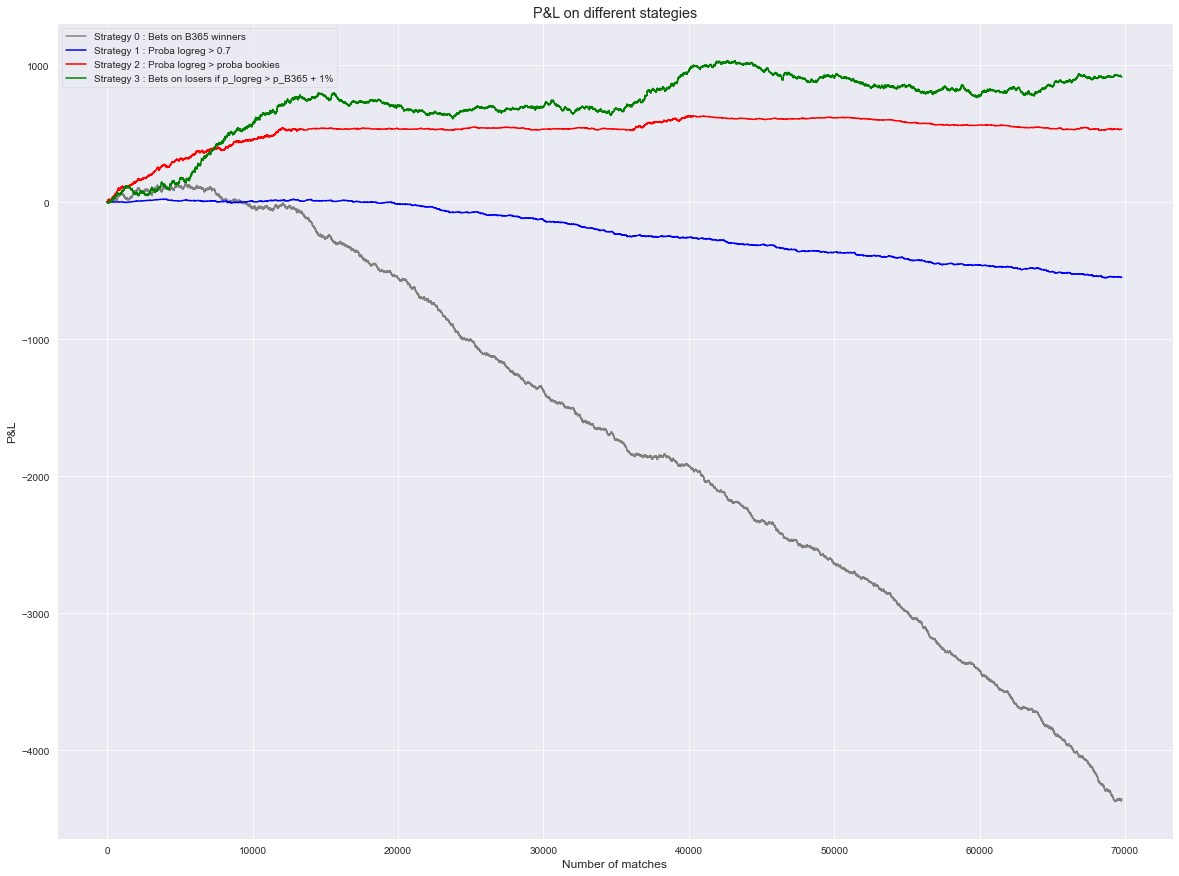

In [181]:
plt.figure(figsize=(20,15))
plt.plot(range(VSbookmakers_pred.shape[0]), VSbookmakers_pred['p&l0'], 'grey', label='Strategy 0 : Bets on B365 winners')
plt.plot(range(VSbookmakers_pred.shape[0]), VSbookmakers_pred['p&l'], 'b-', label='Strategy 1 : Proba logreg > 0.7')
plt.plot(range(VSbookmakers_pred.shape[0]), VSbookmakers_pred['p&l2'], 'r-', label='Strategy 2 : Proba logreg > proba bookies')
plt.plot(range(VSbookmakers_pred.shape[0]), VSbookmakers_pred['p&l3'], 'g-', label='Strategy 3 : Bets on losers if p_logreg > p_B365 + 1%')
plt.xlabel('Number of matches')
plt.ylabel('P&L')
plt.legend()
plt.title('P&L on different stategies');

In [182]:
#With XGBoost

VSbookmakers_pred["xgb_p1"] = xgb1.predict(xgb.DMatrix(data_scaled))
#VSbookmakers_pred["xgb_p1"] = xgb1.predict(test)

#Strategy 1 : we bet only if proba logreg > threshold
threshold = 0.75
VSbookmakers_pred["bet_result_xgb"] = [0 if ((1-threshold) < row['xgb_p1'] < threshold) 
                               else ((1/row['p1_B365']-1) if ((row['xgb_p1']>threshold)&(row['p1_win']==True)) 
                                                                 else ((1/row['p2_B365']-1) if ((row['xgb_p1']<threshold)&(row['p1_win']==False)) 
                                                                       else -1))
                                 for i, row in VSbookmakers_pred.iterrows()]
VSbookmakers_pred["p&l_xgb"] = VSbookmakers_pred["bet_result_xgb"].cumsum()

#Strategy 2 : we bet only if we are more confident than the bookmaker (ie abs(logreg-0.5)>abs(bookmaker-0.5))
threshold2 = 0
VSbookmakers_pred["bet_result2_xgb"] = [0 if ((abs(row['xgb_p1']-0.5) - abs(row['p1_B365']-0.5)) < threshold2)|((abs(1-row['xgb_p1']-0.5) - abs(row['p2_B365']-0.5)) < threshold2)
                               else ((1/row['p1_B365']-1) if (((row['xgb_p1']-0.5)>0)&(row['p1_win']==True)) 
                                                                 else ((1/row['p2_B365']-1) if (((row['xgb_p1']-0.5)<0)&(row['p1_win']==False)) 
                                                                       else -1))
                                 for i, row in VSbookmakers_pred.iterrows()]

VSbookmakers_pred["p&l2_xgb"] = VSbookmakers_pred["bet_result2_xgb"].cumsum()

#Strategy 3 : we bet on the bookmaker predicted loser if we have proba logreg > proba bookmaker
threshold2 = 0
VSbookmakers_pred["bet_result3_xgb"] = [1/row['p1_B365']-1 if ((row['p1_B365'] < 0.5)&(row['p1_B365']+threshold3 < row['xgb_p1'])&(row['p1_win']==True))
                                     else ((1/row['p2_B365']-1) if ((row['p2_B365'] < 0.5)&(row['p2_B365']+threshold3 < (1-row['xgb_p1']))&(row['p1_win']==False))
                                                                      else (-1 if ((row['p1_B365'] < 0.5)&(row['p1_B365']+threshold3 < row['xgb_p1'])&(row['p1_win']==False))|((row['p2_B365'] < 0.5)&(row['p2_B365']+threshold3 < (1-row['xgb_p1']))&(row['p1_win']==True))
                                                                           else 0))
                                    for i, row in VSbookmakers_pred.iterrows()]

VSbookmakers_pred["p&l3_xgb"] = VSbookmakers_pred["bet_result3_xgb"].cumsum()
VSbookmakers_pred

,p1_B365,p2_B365,B365_pred,p1_PS,p2_PS,PS_pred,p1_win,logreg_p1,logreg_p2,logreg_pred,Diff_B365_logreg_p1,Diff_B365_logreg_p2,Diff_PS_logreg_p1,Diff_PS_logreg_p2,bet_result0,p&l0,bet_result,p&l,bet_result2,p&l2,bet_result3,p&l3,xgb_p1,bet_result_xgb,p&l_xgb,bet_result2_xgb,p&l2_xgb,bet_result3_xgb,p&l3_xgb
0,0.478048,0.521952,0,0.478048,0.521952,0,0,0.490182,0.509818,0,-0.012134,0.012134,-0.012134,0.012134,0.915885,0.915885,0.0,0.000000,0.000000,0.000000,-1.0,-1.000000,0.584414,0.0,0.000000,-1.000000,-1.000000,-1.000000,-1.000000
1,0.521952,0.478048,1,0.521952,0.478048,1,1,0.598590,0.401410,1,-0.076638,0.076638,-0.076638,0.076638,0.915885,1.831769,0.0,0.000000,0.915885,0.915885,0.0,-1.000000,0.481386,0.0,0.000000,0.000000,-1.000000,-1.000000,-2.000000
2,0.456132,0.543868,0,0.456132,0.543868,0,0,0.504351,0.495649,1,-0.048219,0.048219,-0.048219,0.048219,0.838681,2.670450,0.0,0.000000,0.000000,0.915885,-1.0,-2.000000,0.429464,0.0,0.000000,0.838681,-0.161319,0.000000,-2.000000
3,0.477999,0.522001,0,0.477999,0.522001,0,1,0.460115,0.539885,0,0.017884,-0.017884,0.017884,-0.017884,-1.000000,1.670450,0.0,0.000000,-1.000000,-0.084115,0.0,-2.000000,0.551231,0.0,0.000000,1.092053,0.930735,1.092053,-0.907947
4,0.522001,0.477999,1,0.522001,0.477999,1,0,0.647793,0.352207,1,-0.125792,0.125792,-0.125792,0.125792,-1.000000,0.670450,0.0,0.000000,-1.000000,-1.084115,0.0,-2.000000,0.569021,0.0,0.000000,-1.000000,-0.069265,0.000000,-0.907947
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69783,0.526316,0.526316,0,0.515464,0.505051,1,0,0.510367,0.489633,1,0.015949,0.036682,0.005097,0.015417,-1.000000,-4355.126085,0.0,-546.155688,0.000000,535.240454,0.0,916.728471,0.542825,0.0,583.742526,-1.000000,3531.327029,0.000000,10475.167784
69784,0.454545,0.602410,0,0.411523,0.606061,0,0,0.449910,0.550090,0,0.004635,0.052320,-0.038387,0.055971,0.660000,-4354.466085,0.0,-546.155688,0.000000,535.240454,0.0,916.728471,0.387548,0.0,583.742526,0.660000,3531.987029,0.000000,10475.167784
69785,0.602410,0.454545,1,0.606061,0.411523,1,1,0.545562,0.454438,1,0.056848,0.000107,0.060499,-0.042916,0.660000,-4353.806085,0.0,-546.155688,0.000000,535.240454,0.0,916.728471,0.582061,0.0,583.742526,0.000000,3531.987029,0.000000,10475.167784
69786,0.285714,0.769231,0,0.275482,0.746269,0,0,0.302078,0.697922,0,-0.016363,0.071308,-0.026595,0.048346,0.300000,-4353.506085,0.0,-546.155688,0.000000,535.240454,-1.0,915.728471,0.317672,0.0,583.742526,0.000000,3531.987029,-1.000000,10474.167784


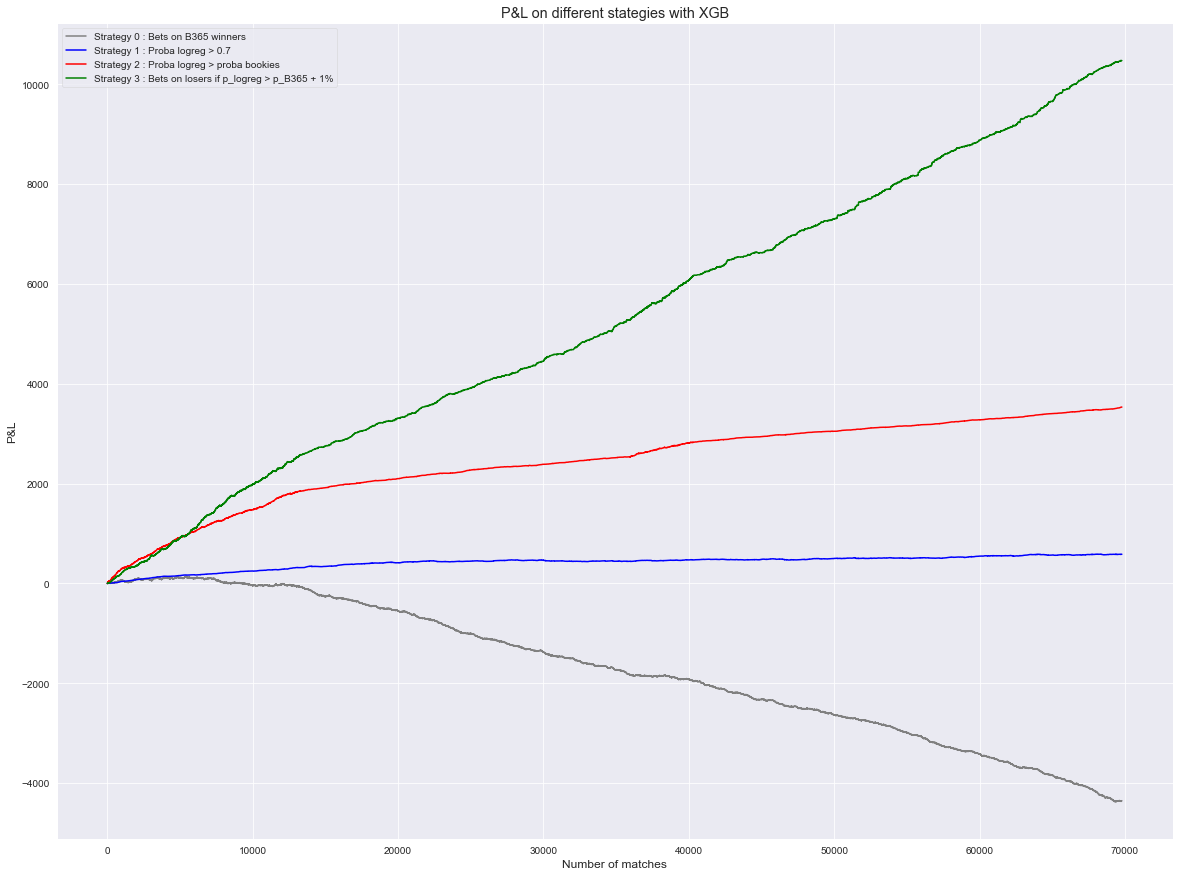

In [183]:
plt.figure(figsize=(20,15))
plt.plot(range(VSbookmakers_pred.shape[0]), VSbookmakers_pred['p&l0'], 'grey', label='Strategy 0 : Bets on B365 winners')
plt.plot(range(VSbookmakers_pred.shape[0]), VSbookmakers_pred['p&l_xgb'], 'b-', label='Strategy 1 : Proba logreg > 0.7')
plt.plot(range(VSbookmakers_pred.shape[0]), VSbookmakers_pred['p&l2_xgb'], 'r-', label='Strategy 2 : Proba logreg > proba bookies')
plt.plot(range(VSbookmakers_pred.shape[0]), VSbookmakers_pred['p&l3_xgb'], 'g-', label='Strategy 3 : Bets on losers if p_logreg > p_B365 + 1%')
plt.xlabel('Number of matches')
plt.ylabel('P&L')
plt.legend()
plt.title('P&L on different stategies with XGB');

In [185]:
VSbookmakers_pred['bet_result3_xgb'].value_counts()

 0.000000    52810
-1.000000     8202
 1.250000      425
 1.620000      401
 1.500000      378
             ...  
 1.160971        1
 1.664986        1
 1.535347        1
 1.067581        1
 1.276387        1
Name: bet_result3_xgb, Length: 2465, dtype: int64